## Heart Disease Prediction 

Every year, the [World Health Organization](https://www.who.int/health-topics/cardiovascular-diseases#tab=tab_1) (WHO) estimates that approximately 17.9 million people succumb to cardiovascular diseases (CVDs), a statistic that WHO identifies as the leading cause of death globally. The identification of various risk factors such as an unhealthy diet, insufficient physical activity, or mental illness can play a pivotal role in preventing numerous premature deaths.

My objective is to develop a reliable model that can predict with a high degree of confidence whether an individual has a heart disease. I set a benchmark for acceptability at an accuracy level of 75% or higher. The dataset comprises several features, each providing valuable information:

Age: age of the patient [years]

Sex: sex of the patient [M: Male, F: Female]

ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]

RestingBP: resting blood pressure [mm Hg]

Cholesterol: serum cholesterol [mm/dl]

FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]

RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]

MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]

ExerciseAngina: exercise-induced angina [Y: Yes, N: No]

Oldpeak: oldpeak = ST [Numeric value measured in depression]

ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]

HeartDisease: output class [1: heart disease, 0: Normal]

In [1]:
import pandas as pd
import numpy as np
heart = pd.read_csv('heart.csv')

## Exploring the data 
Let's explore the data to get acquainted to the columns and entries in the dataset

In [2]:
print(heart.head(10))
print(heart.shape)
#checking the columns
heart.columns 

   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   
5   39   M           NAP        120          339          0     Normal    170   
6   45   F           ATA        130          237          0     Normal    170   
7   54   M           ATA        110          208          0     Normal    142   
8   37   M           ASY        140          207          0     Normal    130   
9   48   F           ATA        120          284          0     Normal    120   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1     

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB
None
              Age   RestingBP  Cholesterol   FastingBS       MaxHR  \
count  918.000000  918.000000   918.000000  918.000000  918.000000   
mean    53.510893  132.396514   198.799564    0.233115  1

<Axes: >

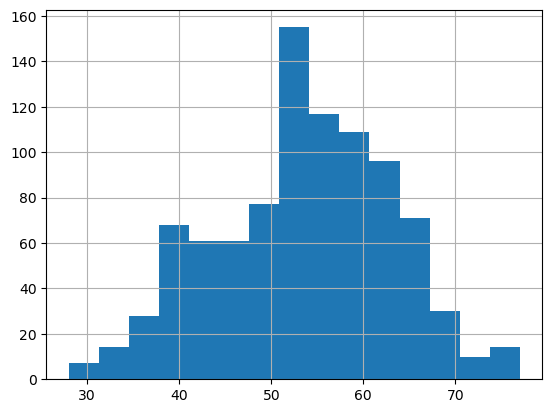

In [3]:
print(heart.info())
print(heart.describe())
#creating a histogram to understand the distribution of the age column**************************************************
heart['Age'].hist(bins=15)

We can confirm that there are no missing data in all of our dataset. This reduces the work of cleaning our data so we can focus on analyzing and preparing the model. The age distribution shows that the patients in our dataset mostly consists of the elderly.

## Conducting EDA Analysis
Let's take a look at the number of observations in each column. This allows us to understand the frequency of the unique values in each column

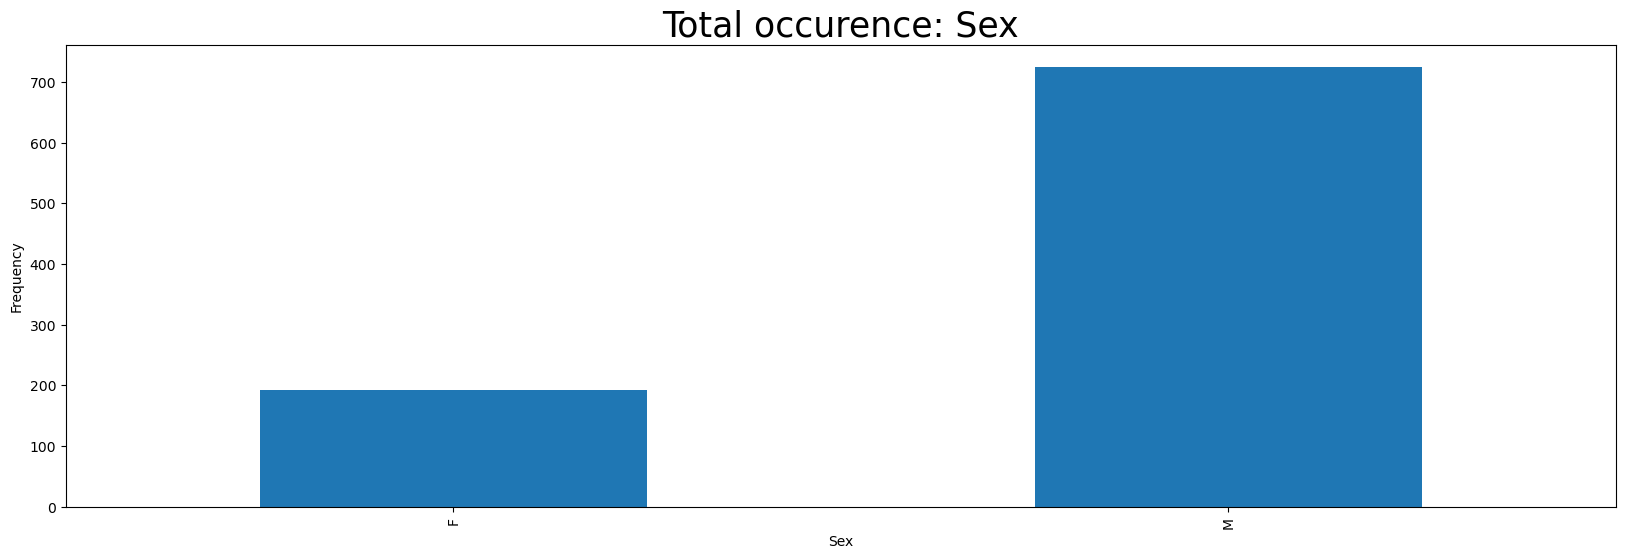

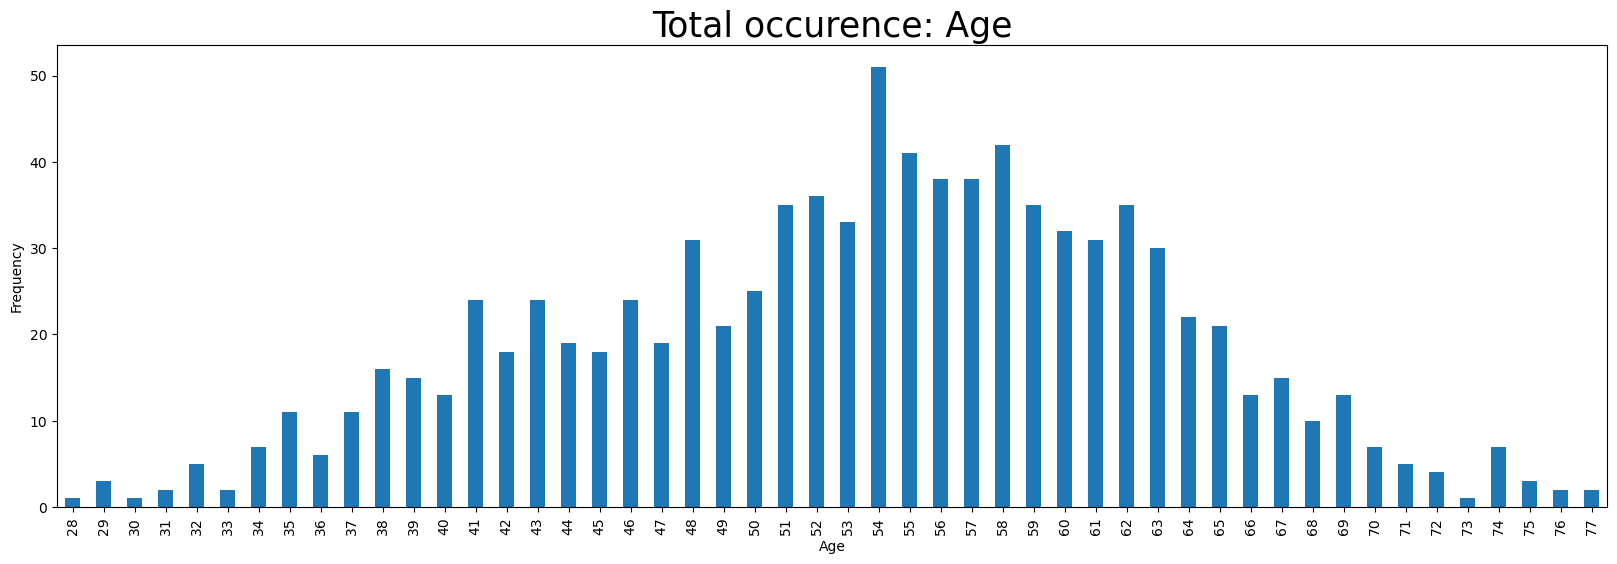

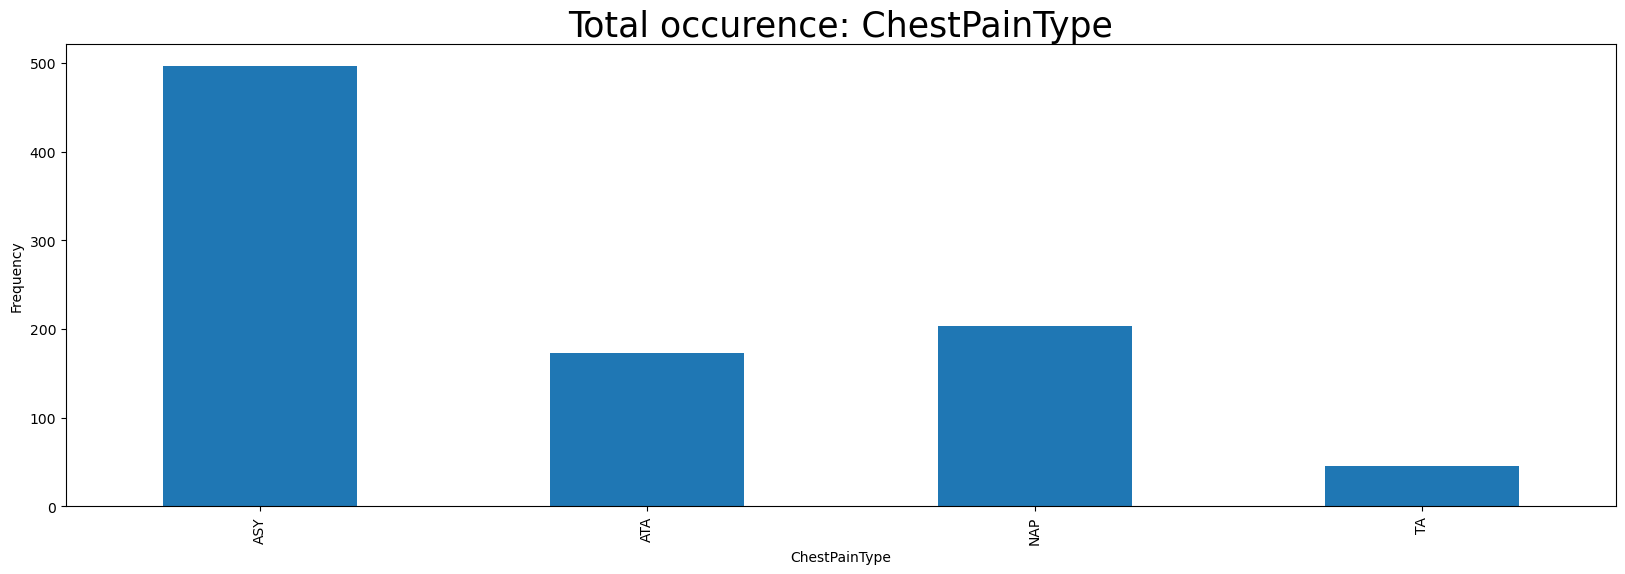

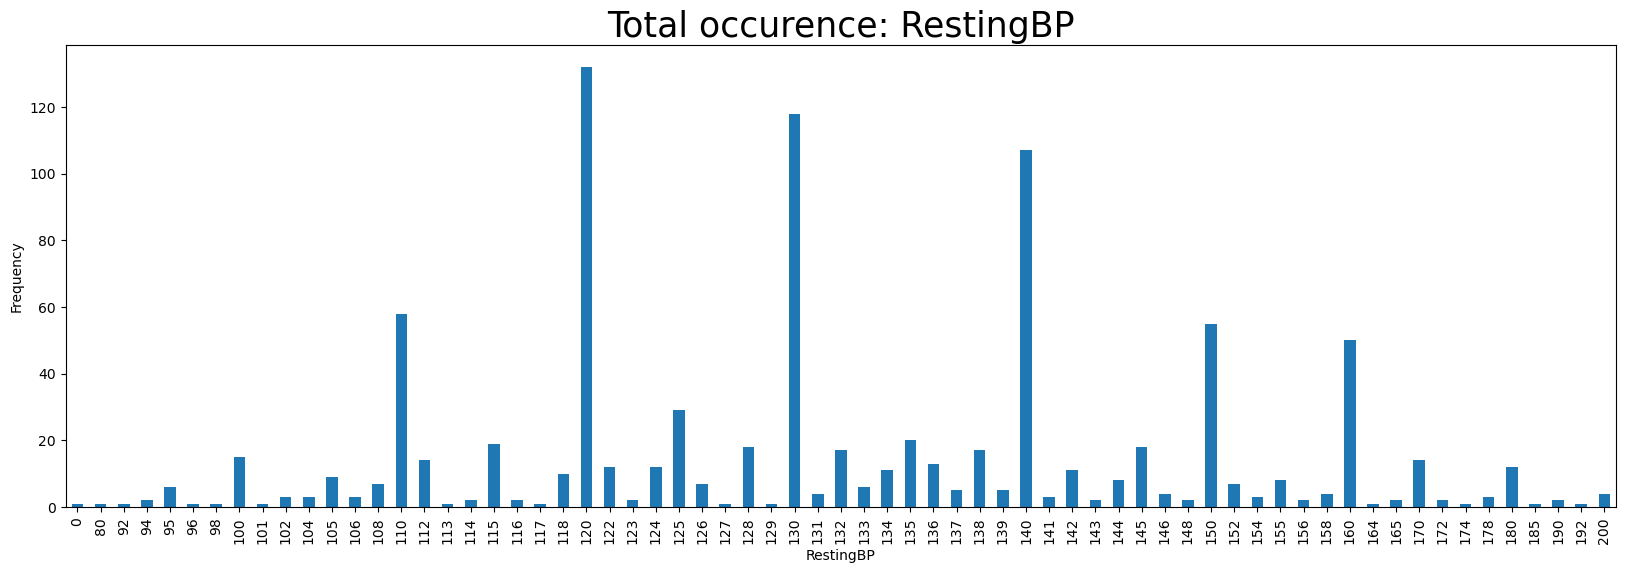

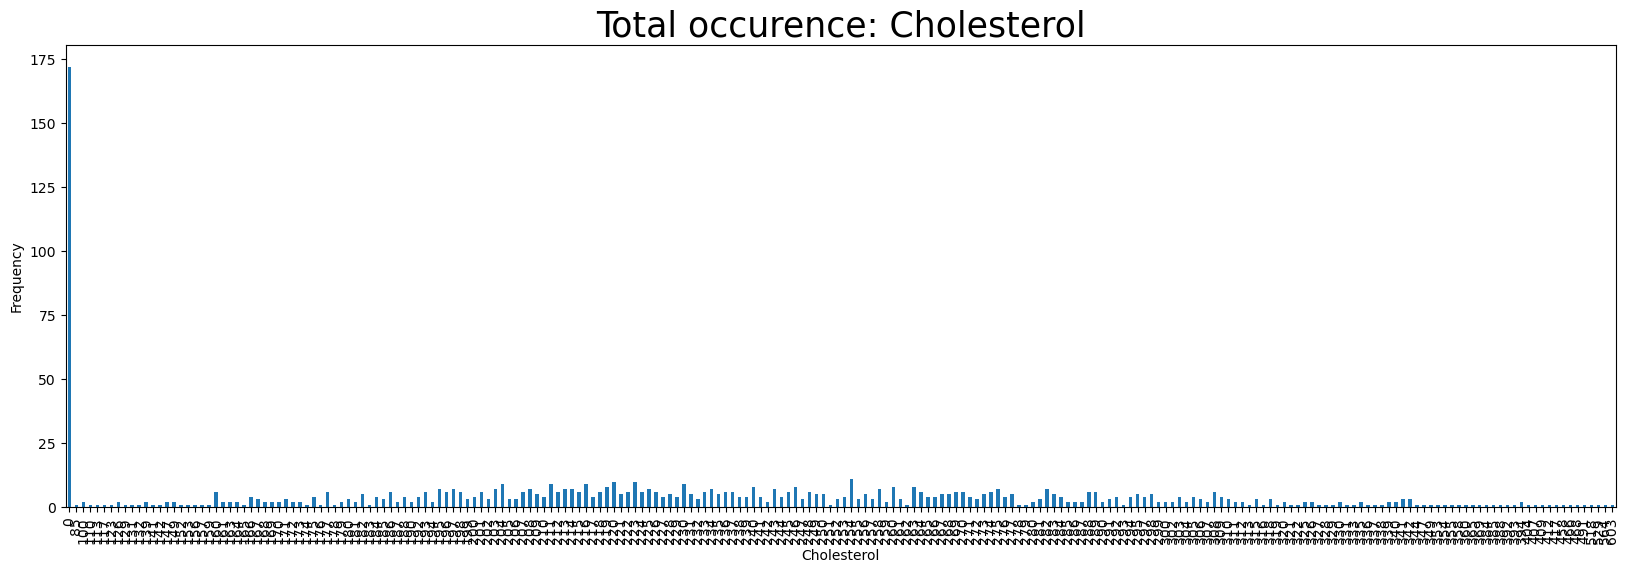

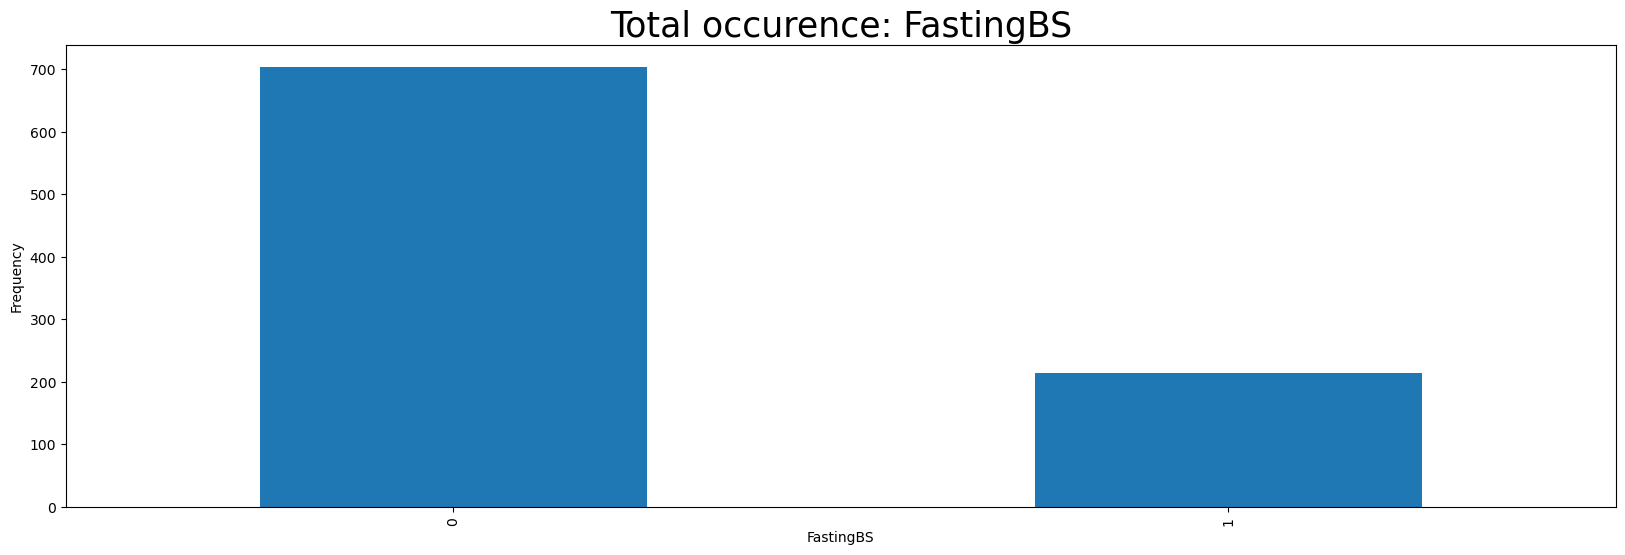

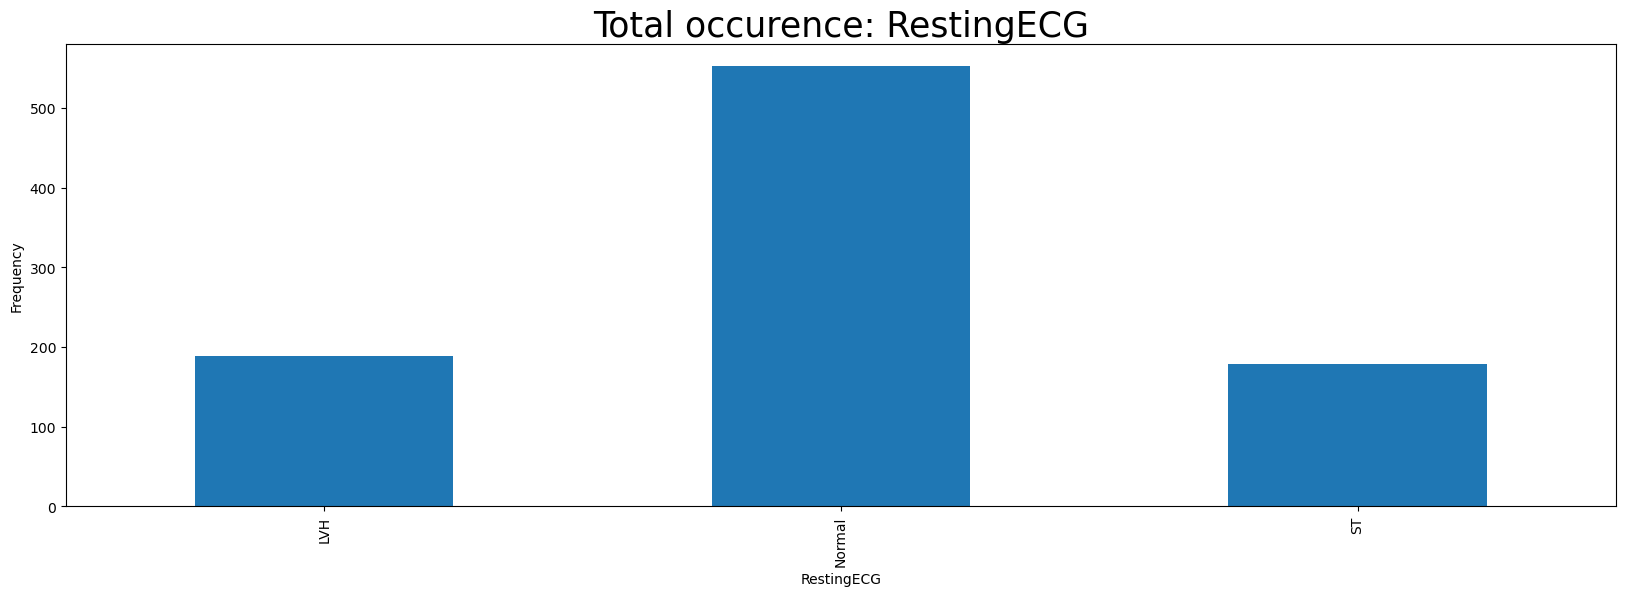

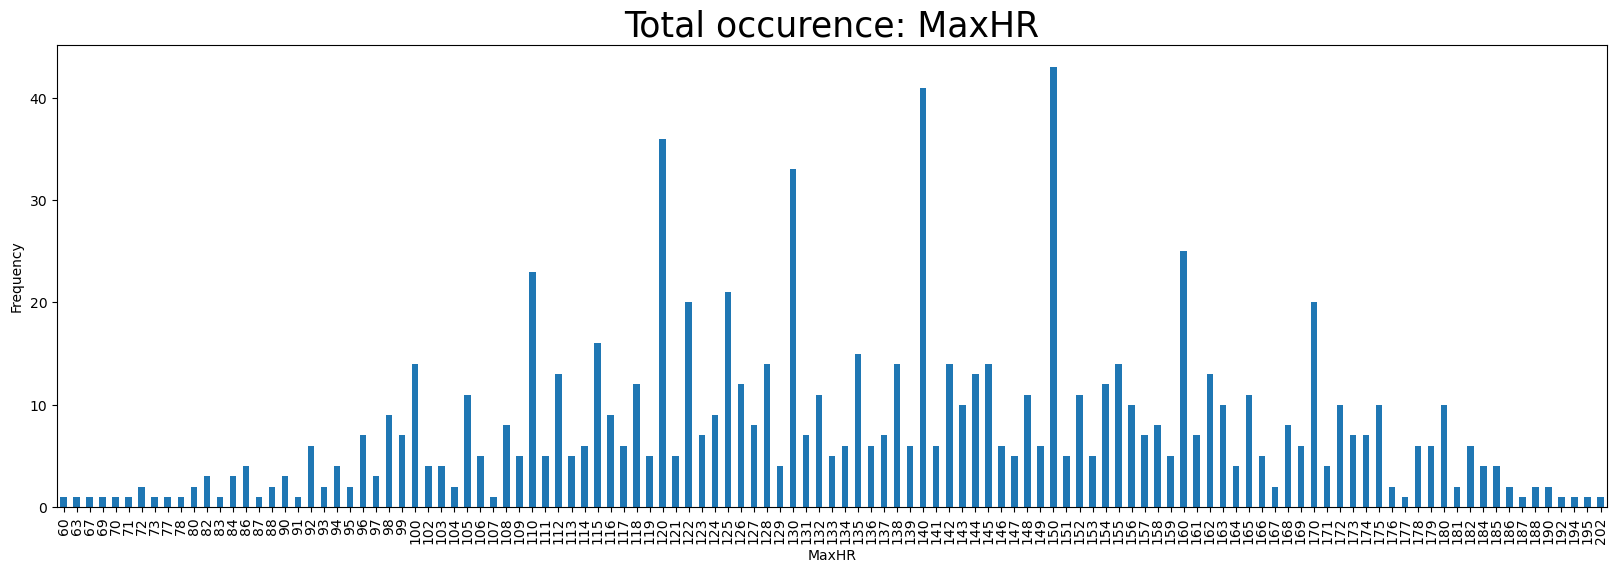

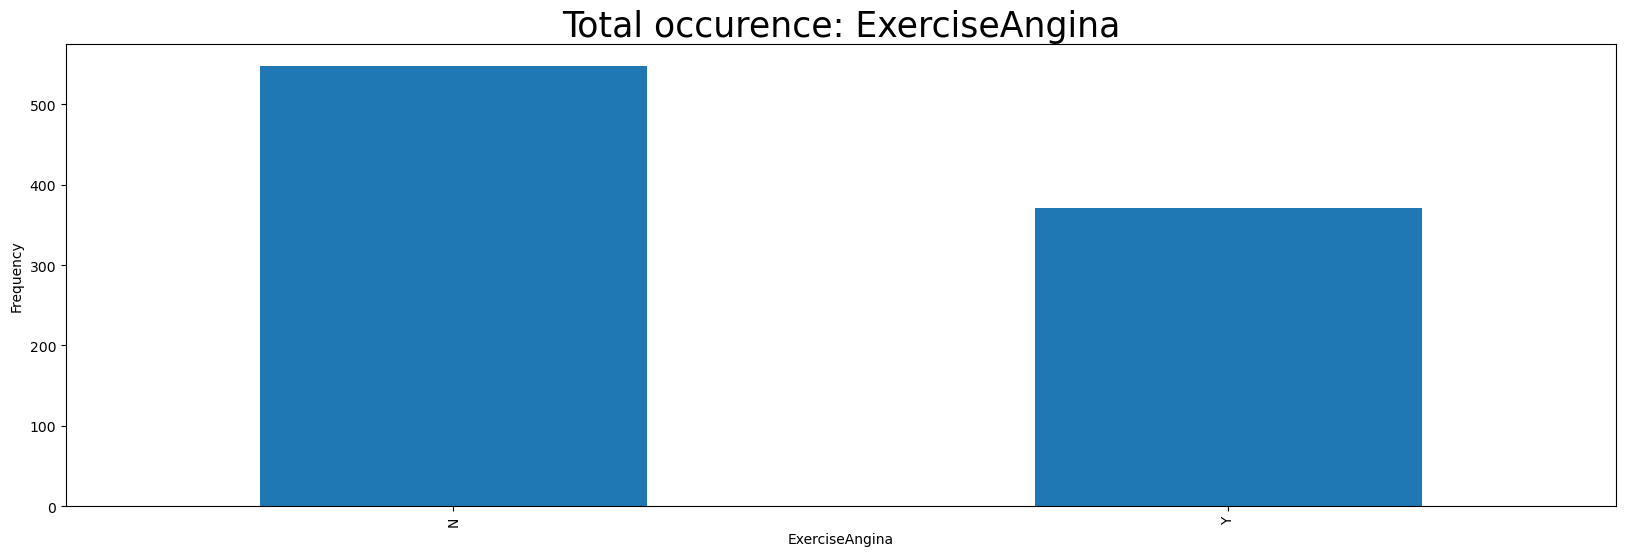

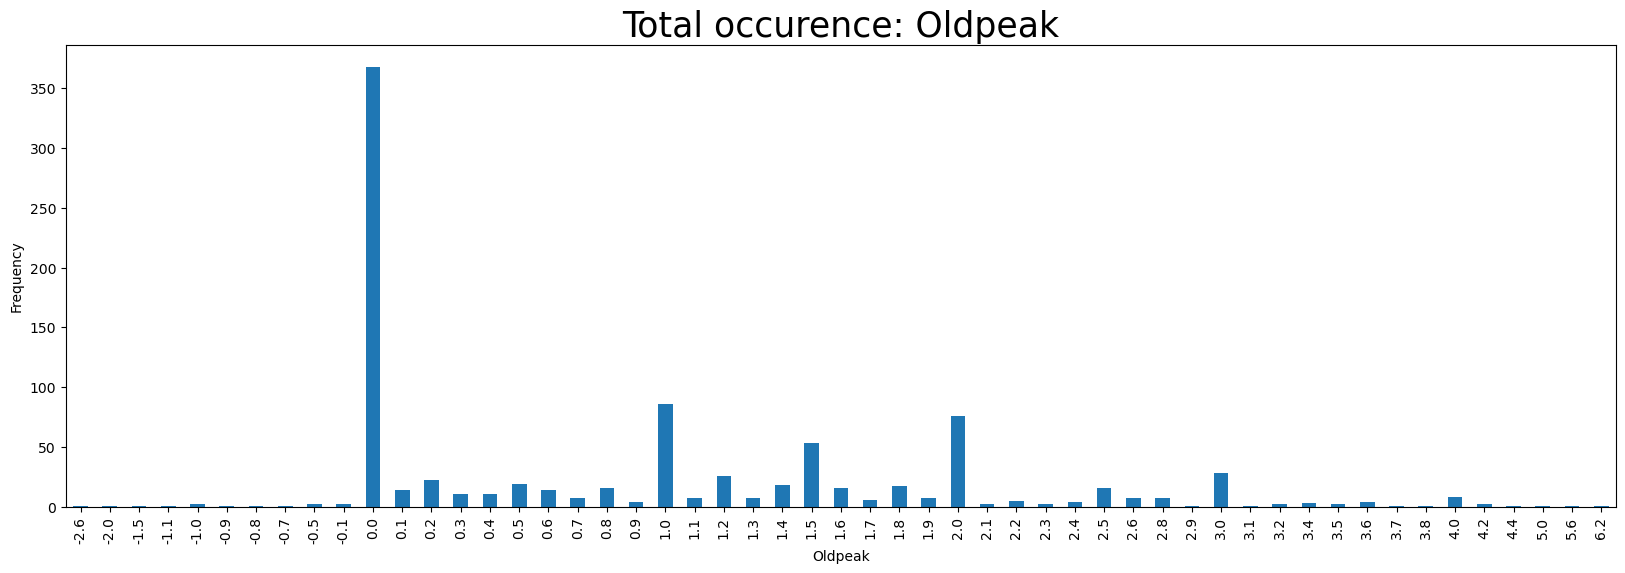

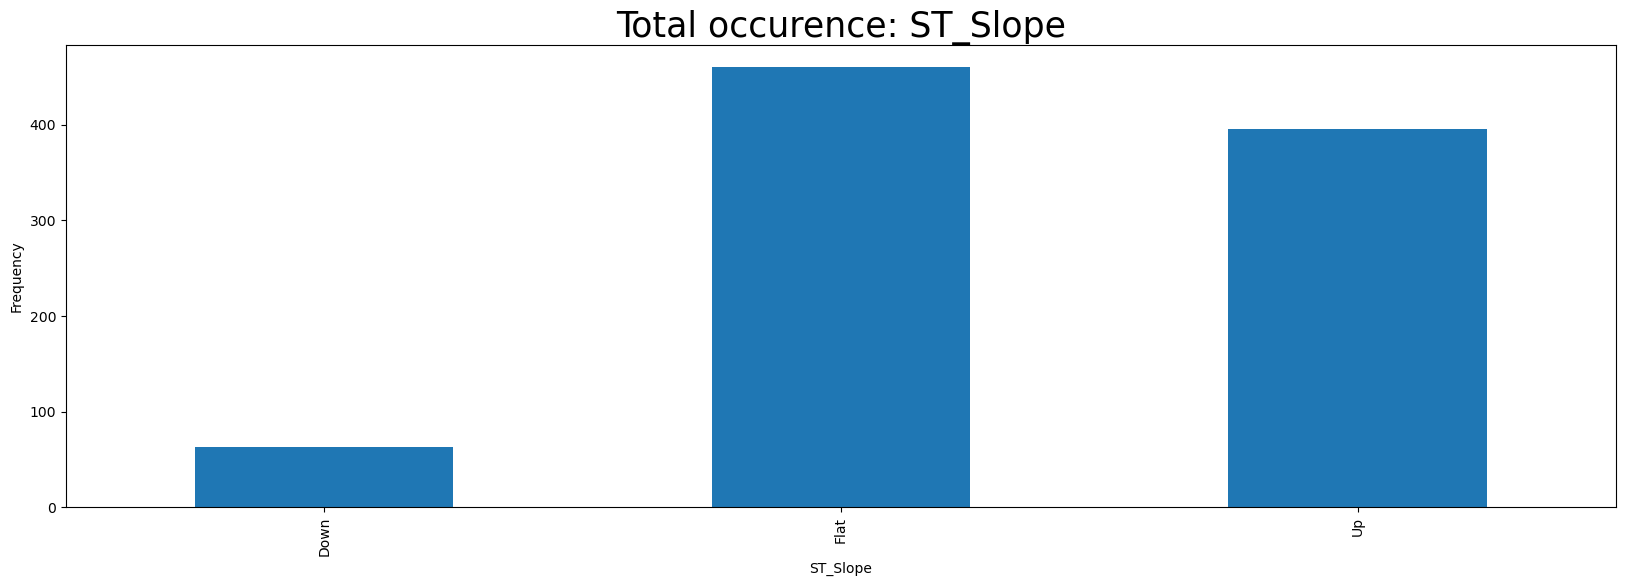

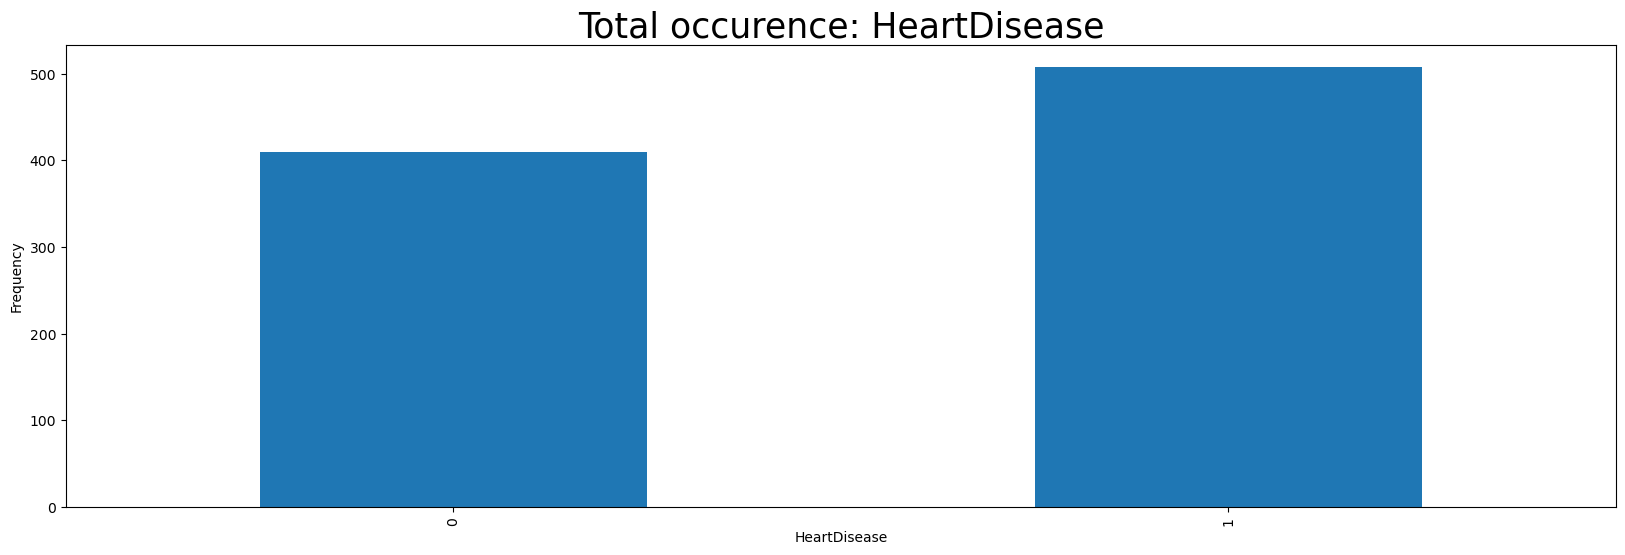

In [4]:
#checking the number of null values in the columns
heart.isna().sum()
#creating a separate series for each numerical column for plotting individual histograms
Sex = heart['Sex'].value_counts().sort_index()
Age = heart['Age'].value_counts().sort_index()
ChestPainType = heart['ChestPainType'].value_counts().sort_index()
RestingBP = heart['RestingBP'].value_counts().sort_index()
Cholesterol = heart['Cholesterol'].value_counts().sort_index()
FastingBS = heart['FastingBS'].value_counts().sort_index()
RestingECG = heart['RestingECG'].value_counts().sort_index()
MaxHR = heart['MaxHR'].value_counts().sort_index()
ExerciseAngina = heart['ExerciseAngina'].value_counts().sort_index()
Oldpeak = heart['Oldpeak'].value_counts().sort_index()
ST_Slope = heart['ST_Slope'].value_counts().sort_index()
HeartDisease = heart['HeartDisease'].value_counts().sort_index()
#creating a list that includes the numerical columns and their names to iterate over
columns = [('Sex', Sex), ('Age', Age), ('ChestPainType', ChestPainType), ('RestingBP', RestingBP), ('Cholesterol', Cholesterol), 
              ('FastingBS', FastingBS), ('RestingECG', RestingECG), ('MaxHR', MaxHR), ('ExerciseAngina', ExerciseAngina), 
              ('Oldpeak', Oldpeak), ('ST_Slope', ST_Slope), ('HeartDisease', HeartDisease)]
#plotting the histogram for each numerical column          
import matplotlib.pyplot as plt
%matplotlib inline
for category, column in columns:
    plt.figure(figsize=(20, 6))
    column.plot(kind='bar')
    plt.ylabel('Frequency')
    plt.xlabel(category)
    plt.title(f"Total occurence: {category}", weight=15, fontsize=25)
    plt.show()   

The following can be derived from the chart:
1. There are more than three times more male patients than female.
2. The Age column has a normal distribution with most of the patients aging around 48 to 62 years.
3. The most prevalent type of chest pain among the patients is Asymptomatic.
4. Most resting blood pressure are 120, 130 and 140.
5. The most common serum cholesterol is 0.
6. Roughly 3 times more patients have fasting blood sugar greater than 120mg.
7. More than half the patients have a normal resting electrocardiogram result.
8. The maximum heart rate achieved is nomally distributed with most of the values between 110 and 160.
9. Less patients have exercise induced angina.
10. The old peak column distribution is left skewed with majority of the values falling under 0.
11. A large minority of patients have downslopping peak exercise. Most of the patients are either flat or upslopping.
12. Majority of the patients have a heart disease.

## EDA Analysis on Categorical columns grouped by HealthDisease
Performing this EDA on selected columns gives us insights into the people who are more prone to heart disease. 1 represents patients who have heart disease while 0 represents patients who do not have heart disease. For instance [m, 1] means patients who are male and have heart disease

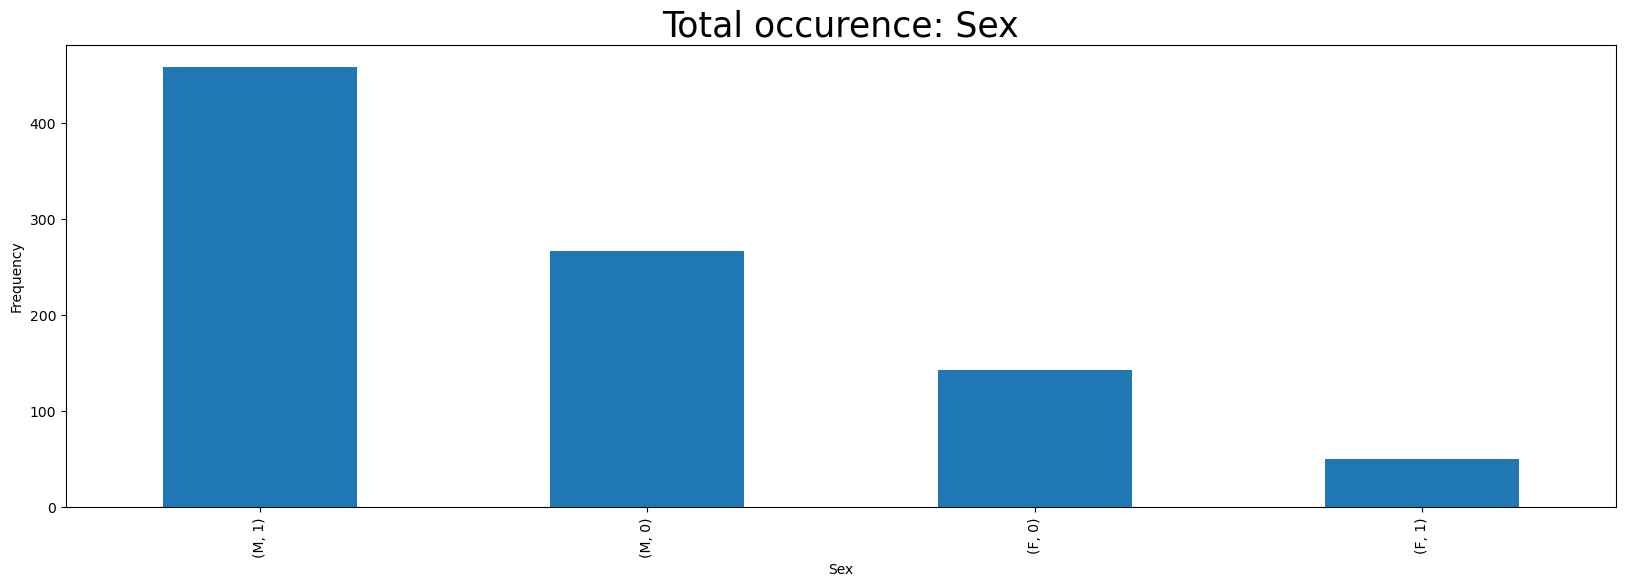

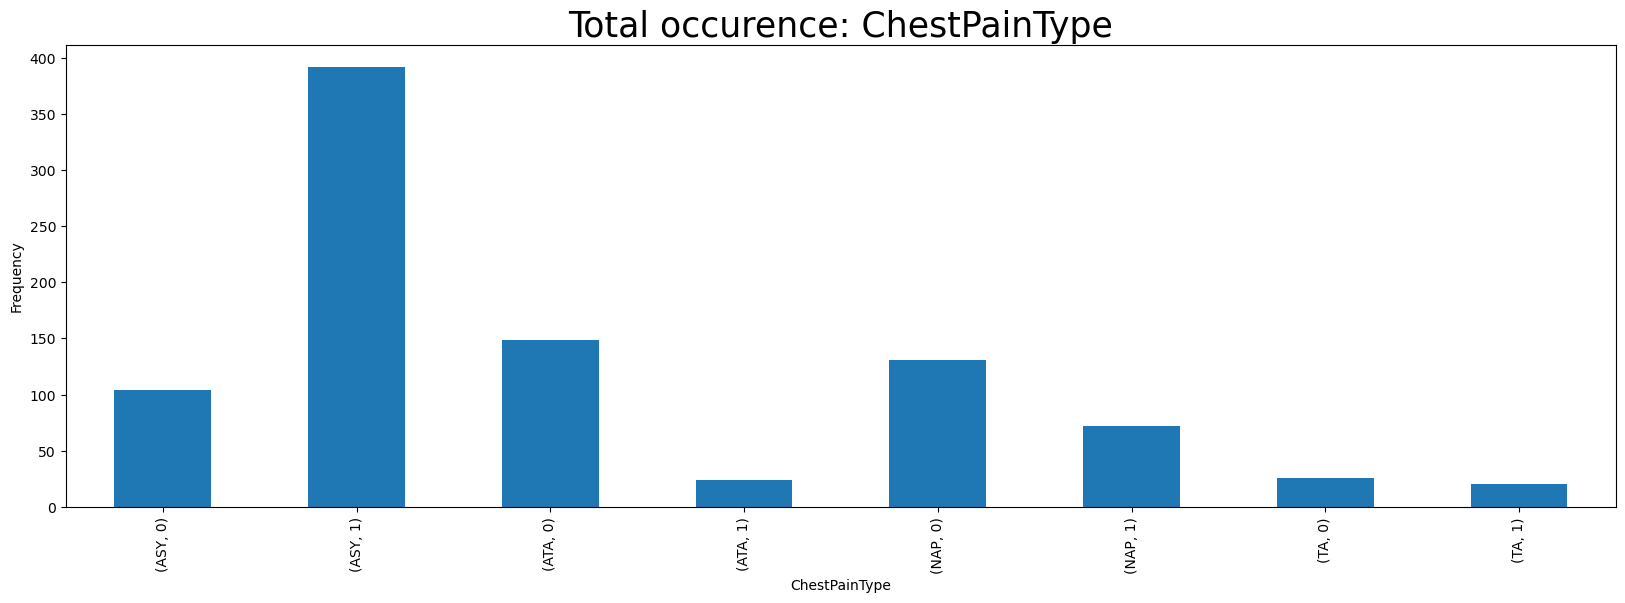

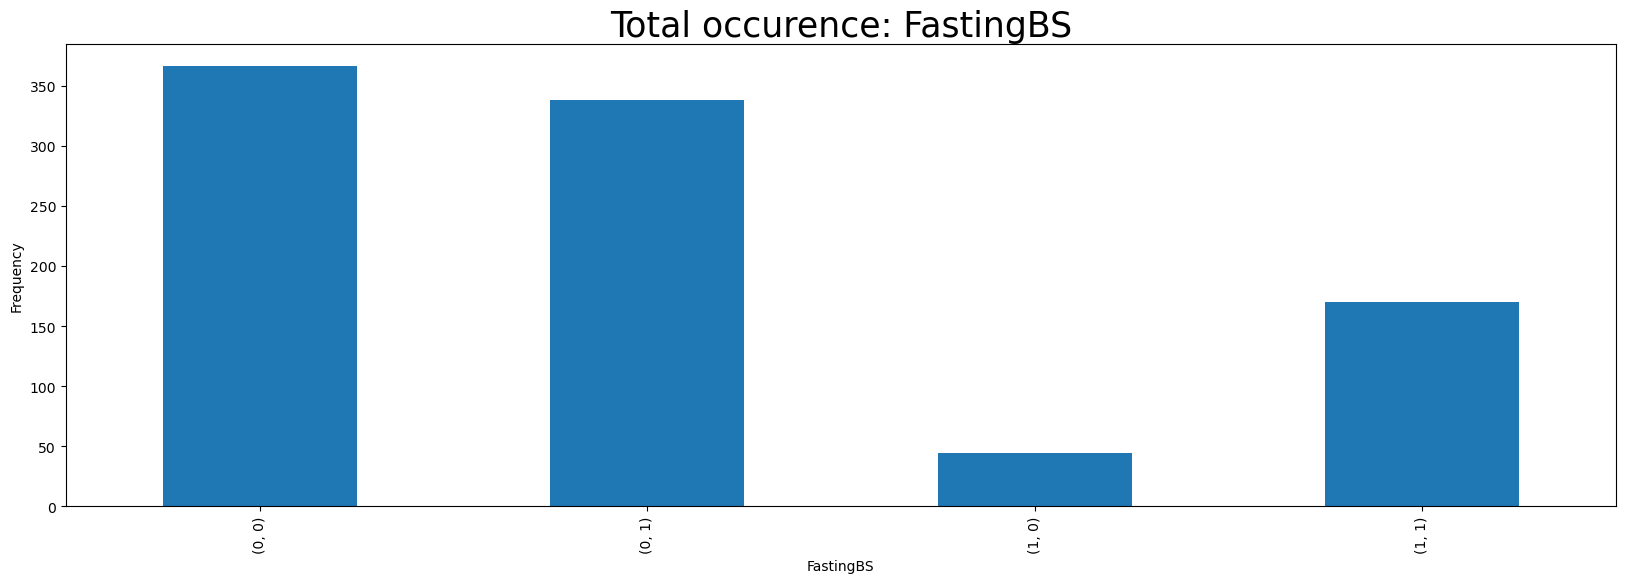

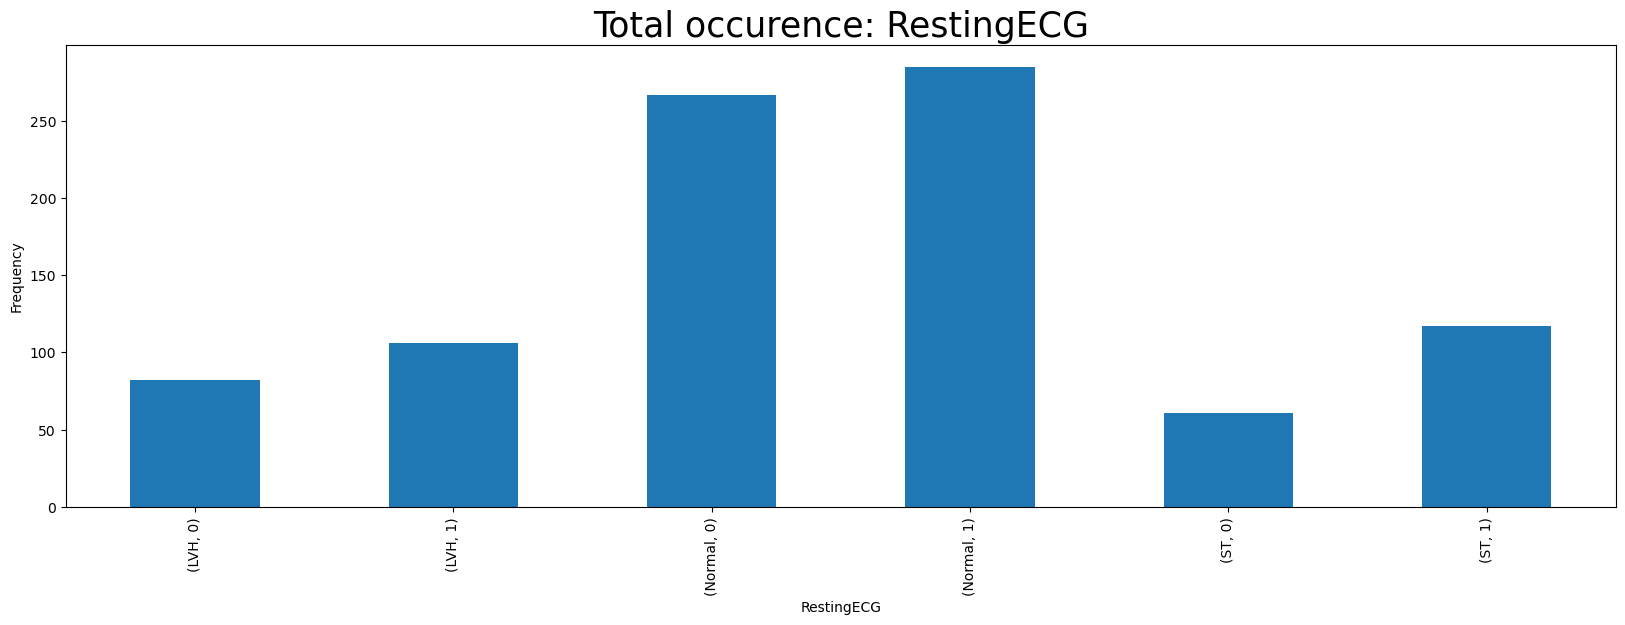

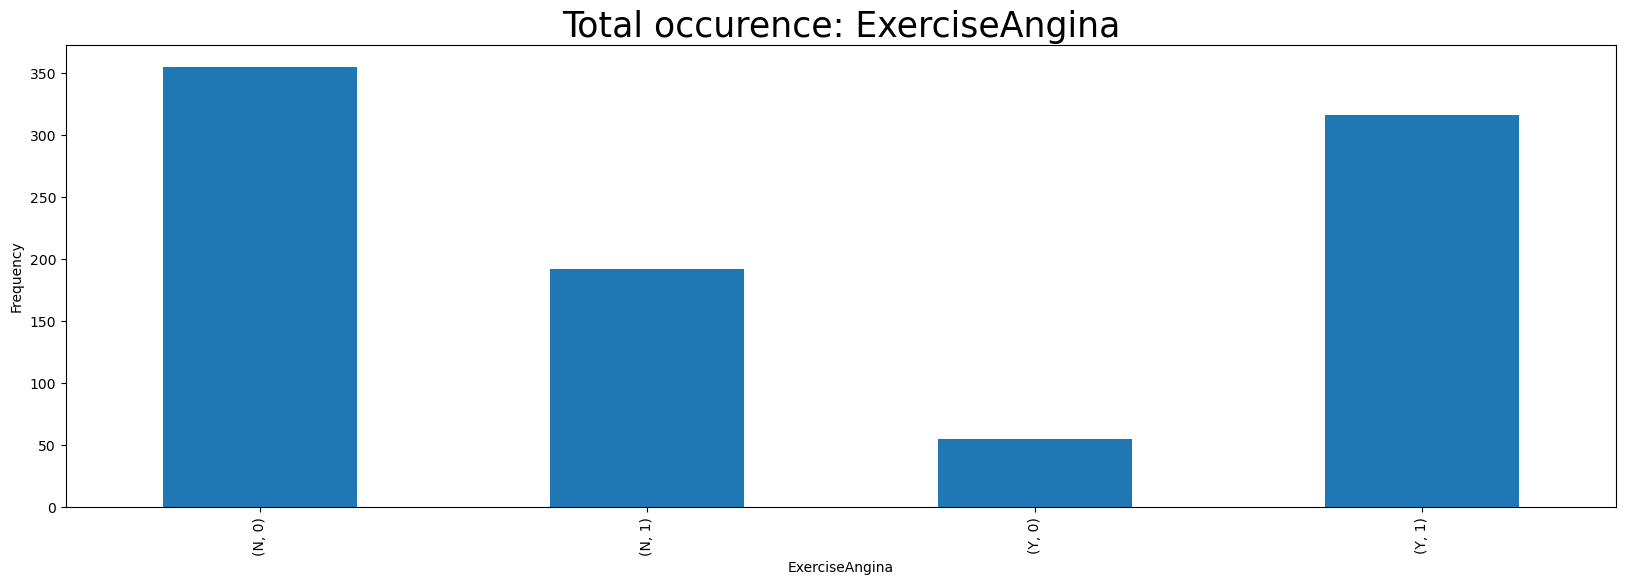

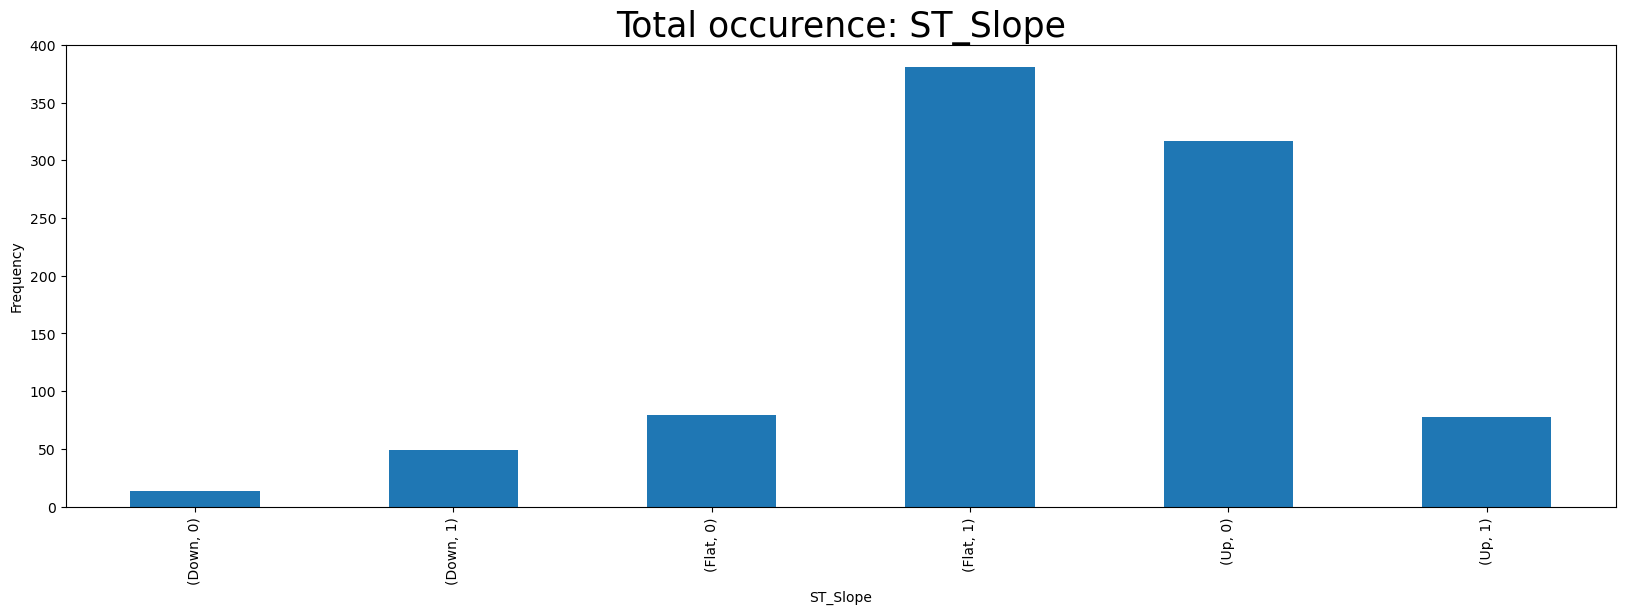

In [5]:
Sex_HeartDisease = heart[['Sex', 'HeartDisease']].value_counts()
ChestPainType_HeartDisease = heart[['ChestPainType', 'HeartDisease']].value_counts().sort_index()
FastingBS_HeartDisease = heart[['FastingBS', 'HeartDisease']].value_counts().sort_index()
RestingECG_HeartDisease = heart[['RestingECG', 'HeartDisease']].value_counts().sort_index()
ExerciseAngina_HeartDisease = heart[['ExerciseAngina', 'HeartDisease']].value_counts().sort_index()
ST_Slope_HeartDisease = heart[['ST_Slope', 'HeartDisease']].value_counts().sort_index()
columns = [('Sex', Sex_HeartDisease), ('ChestPainType', ChestPainType_HeartDisease), 
              ('FastingBS', FastingBS_HeartDisease), ('RestingECG', RestingECG_HeartDisease), 
           ('ExerciseAngina', ExerciseAngina_HeartDisease), ('ST_Slope', ST_Slope_HeartDisease)]
          
import matplotlib.pyplot as plt
%matplotlib inline
for category, column in columns:
    plt.figure(figsize=(20, 6))
    column.plot(kind='bar')
    plt.ylabel('Frequency')
    plt.xlabel(category)
    plt.title(f"Total occurence: {category}", weight=15, fontsize=25)
    plt.show()   


##### 1. About 2x more male and female patients have a heart disease.
##### 2. About 4x more asymptomatic patients and 6x more atypical angina patients with chest pain have a heart disease.
##### 3. More than 3x the number of patients with fasting blood sugar greater than 120mg have a heart disease.
##### 4. About twice the number of patients with ST-T wave abnormalities have a heart disease.
##### 5. About 7x the number of patients with and twice the number of patients without exercise-induced angina have a heart disease.
##### 6. About 7x the number of patients with flat slope, 5x the number of patients with upslopping and 3x the number of patients with downslopping peak exercise ST segment have a heart disease.

## EDA Analysis continuation
Let's now analyze the occurence of heart disease in male and female and check our dataset to confirm thaat the outcome column has a fair amount of representation from both classes

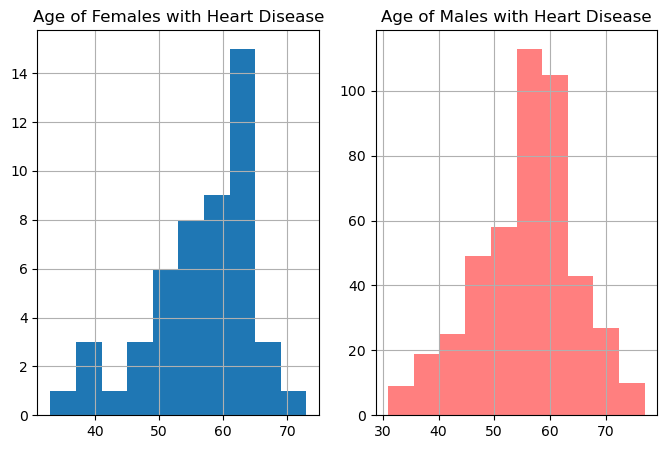

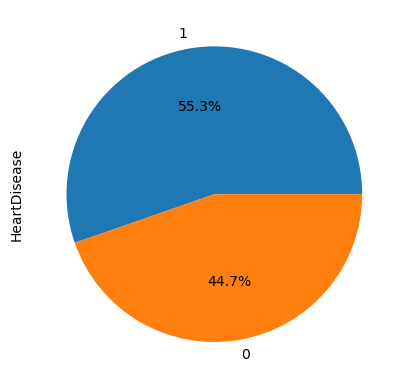

In [6]:
HeartDisease = heart[heart['HeartDisease'] == 1]
Male_HeartDisease = heart[(heart['HeartDisease'] == 1) & (heart['Sex'] == 'M')]
Female_HeartDisease = heart[(heart['HeartDisease'] == 1) & (heart['Sex'] == 'F')]

plt.figure(figsize=(8,5))
plt.subplot(1,2,1)
Male_HeartDisease['Age'].value_counts(normalize=True)
Female_HeartDisease['Age'].hist()
plt.title('Age of Females with Heart Disease')
plt.subplot(1,2,2)
Male_HeartDisease['Age'].hist(color='red', alpha=0.5)
plt.title('Age of Males with Heart Disease')
plt.show()
Male_Disease_50 = Male_HeartDisease[Male_HeartDisease['Age'] >=50]
Female_Disease_50 = Female_HeartDisease[Female_HeartDisease['Age'] >=50]
HeartDisease_median = int(HeartDisease['Age'].median())
heart['HeartDisease'].value_counts().plot.pie(autopct='%1.1f%%')
plt.show()

##### Generally, heart disease happens earlier in men (around 54) than women (around 61).
##### Heart disease is more common among patients around 50 - 65 years old.
##### 70% of patients who have heart disease are aged 50 years and above.
##### The average age of patients who have heart disease is 57.
##### The positive and negative cases of heart disease have a fair percent of representation on the dataset.

## Cleaning the columns with anomalies
The RestingBp and Cholesterol columns contain zeros which is not nomal. Investigating the number of zeros that exist in the columns and replacing them with the columns' average values.

In [7]:
RestingBp_row = (heart['RestingBP'] == 0).sum()
Cholesterol_row = (heart['Cholesterol'] == 0).sum()
print(f'The number of RestingBp rows with zeros are {RestingBp_row}')
print(f'The number of Cholesterol rows with zeros are {Cholesterol_row}')

The number of RestingBp rows with zeros are 1
The number of Cholesterol rows with zeros are 172


## Replacing the zero values with the median of the columns
As a standard practice we will replace the zero columns which are anomalies in the column with the average value of the columns. This helps reduce the margin of error in filling the affected rows in the columns

In [8]:
heart['age_class'] = heart['Age'].apply(lambda x: 'above 50' if x >= 50 else 'below 50')
heart.loc[heart['RestingBP'] == 0, 'RestingBP'] = heart.loc[(heart['Age'] > 50) & (heart['Sex'] == 'M') & (heart['HeartDisease'] == 1), 'RestingBP'].median()
heart['Cholesterol'] = heart['Cholesterol'].replace(0, np.nan)
#filling the null columns with the average of each distint group instead of filling with the overall mean
heart['Cholesterol'] = heart['Cholesterol'].fillna(heart.groupby(['Sex', 'age_class', 'HeartDisease'])['Cholesterol'].transform('mean'))
heart['Cholesterol'].isna().sum()
heart.drop('age_class', axis=1, inplace=True)

## Creating dummy variables and finding correlations between the predictors and outcome
Finding the correlation between the predictors and our outcome (HeartDisease column) will reveal the columns that best predict the outcome. Subsequently we can use the predictors to individually predict the outcome

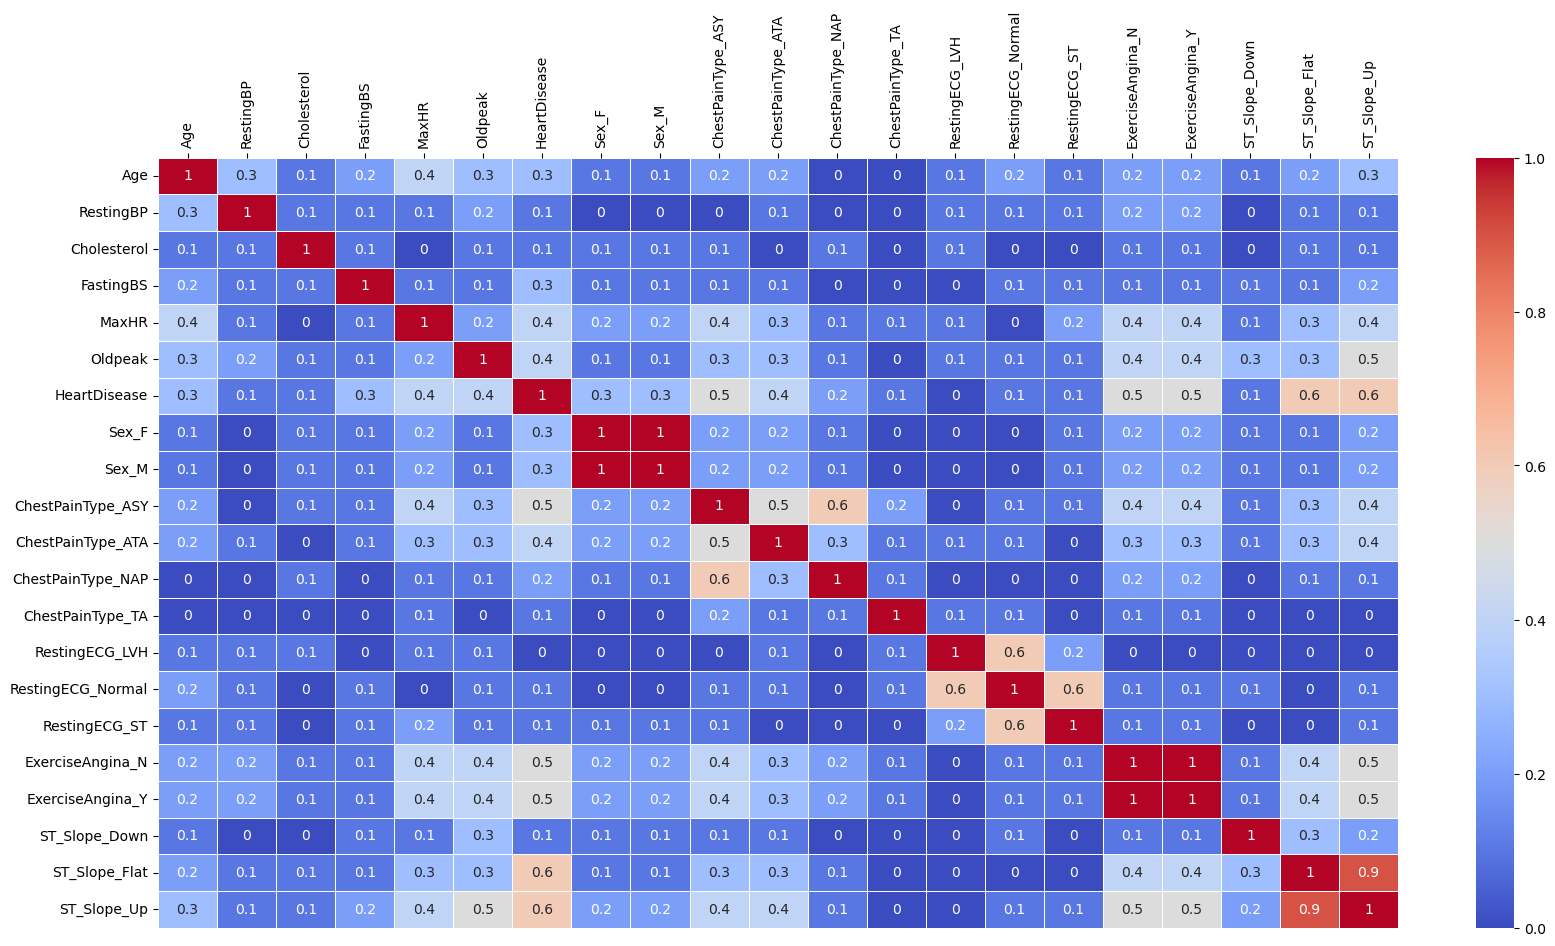

In [9]:
import seaborn as sns
heart = pd.get_dummies(data= heart)
cor = round(abs(heart.corr()), 1)
plt.figure(figsize=(20, 10))
sns.heatmap(round(abs(heart.corr()), 1), annot=True, cmap='coolwarm', linewidths=.5)
plt.tick_params(axis='x', which='both', bottom= False, top=True, labeltop=True, labelbottom=False, rotation=90)

## Testing the Knn model on selected features
We will experiment with different number of neighbors on selected columns one at a time to examine their individual performances. The selection will be based on columns that have strong correlation with the the outcome, HeartDisease column from our correlation map above

In [10]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler
x = heart.drop('HeartDisease', axis=1)
y = heart['HeartDisease']
cor_features = cor['HeartDisease'].sort_values(ascending=False)[1:11].index
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=99)
features = ['ST_Slope_Up', 'ST_Slope_Flat', 'ExerciseAngina_Y', 'ExerciseAngina_N',
       'ChestPainType_ASY', 'ChestPainType_ATA', 'Oldpeak', 'MaxHR', 'Sex_F',
       'Sex_M']
accuracies = {}
for feature in features:
    knn = KNeighborsClassifier(n_neighbors = 7)
    knn.fit(x_train[[feature]], y_train)
    val_accuracy = knn.score(x_val[[feature]], y_val)
    accuracies[feature] = val_accuracy
print(accuracies)        

{'ST_Slope_Up': 0.782608695652174, 'ST_Slope_Flat': 0.7554347826086957, 'ExerciseAngina_Y': 0.7445652173913043, 'ExerciseAngina_N': 0.7445652173913043, 'ChestPainType_ASY': 0.7989130434782609, 'ChestPainType_ATA': 0.7228260869565217, 'Oldpeak': 0.7065217391304348, 'MaxHR': 0.6467391304347826, 'Sex_F': 0.4891304347826087, 'Sex_M': 0.4891304347826087}


The columns produced some impressive individual results. This is a good start in the process. The 'ChestPainType_ASY' feature performed the best, while 'Sex' had the worst performance 

## Fitting all the features to our model
Since most of our individually selected features have a high accuracy, including all can enhance the performance of our model by capturing the relationship as between the outcome column and feature column as a whole. Let's implement it

In [11]:
xtrain, xval, ytrain, yval = train_test_split(x[cor_features], y, test_size=0.20, random_state=99)
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(xtrain)
x_val_scaled = scaler.transform(xval)
knn_1 = KNeighborsClassifier(n_neighbors = 9)
knn_1.fit(x_train_scaled, ytrain)
val_acc = knn_1.score(x_val_scaled, yval)
print(f'the accuracy of the model is: {round(val_acc, 2)}')

the accuracy of the model is: 0.84


The fitting of all the features produced an improved performance of 84 percent accuracy. That is at least 4% more than any individual feature performance achieved

## Testing and choosing the best parameter and hyperparameter for the model 
This time we will increase our test data to 25 percent of the dataset so that our test will have more records to predict on. We will also see if this improves the model accuracy. This will be done while using grid search method to select optimal parameters for the model.

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x[cor_features], y, test_size=.25, random_state=99)
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)

grid_params = {'n_neighbors': range(1,20), 'metric': ['minkowski', 'manhattan', 'euclidean']}
knn = KNeighborsClassifier()
knn_grid = GridSearchCV(knn, grid_params, scoring='accuracy')
knn_grid.fit(x_train_scaled, y_train)

best_params = knn_grid.best_params_
best_score = knn_grid.best_score_

print(f'the best parameters are: {best_params}')
print(f'the best score is: {best_score:.0%}')

the best parameters are: {'metric': 'minkowski', 'n_neighbors': 11}
the best score is: 85%


Our best parameters are minkowski calculation of distance and 11 number of neighbors. Let's see how this performs on our test dataset

## Evauating the model on test set
It is important to get a close result to the our training result. If the results are far apart, this is an indication of the model overfitting on the training data, therefore its ability to generalize well on unseen data will be poor

In [13]:
x_test_scaled = scaler.transform(x_test)
accuracy = knn_grid.best_estimator_.score(x_test_scaled, y_test)
print(f'the model accuracy is: {accuracy:.0%}')

the model accuracy is: 84%


The model result is similar to the average result from the grid search on the training data. Thats an indication that our model can make well generalized predictions on unseen dataset

## Applying grid search optimal parameters
We will now apply the result from the grid search to build our model. Also, we will see the actual result of the parameters on our training data and compare it to the result on the test data

In [14]:
final_model = KNeighborsClassifier(metric='minkowski', n_neighbors=11)
final_model.fit(x_train_scaled, y_train)
train_accuracy = final_model.score(x_train_scaled, y_train)
test_accuracy = final_model.score(x_test_scaled, y_test)
print(f'the accuracy on training data is {train_accuracy:.0%}')
print(f'the accuracy on test data is {test_accuracy: .0%}')

the accuracy on training data is 87%
the accuracy on test data is  84%


The result of the model on the training and test data are close. This means that our model is able to reciprocate its accuracy that it had on the training data on the test data. Most importantly, it is able to predict correctly at a high level of confidence.

## Checking the model's ability to predict the positive and negative cases
This is necessary because it is likely that the model has a correct prediction of one class but moderate or low prediction of the other. This happens more often when one class dominates the dataset. Let's confirm that our model can predict the both classes at a high rate of accuracy.

In [15]:
from sklearn.metrics import classification_report, confusion_matrix
classification = classification_report(final_model.predict(x_test_scaled), y_test)
#using the print(classification report as a line break to organize the result of the classificatio_report)
print('classification report')
print(classification)
matrix = confusion_matrix(final_model.predict(x_test_scaled), y_test)

classification report
              precision    recall  f1-score   support

           0       0.79      0.89      0.84       105
           1       0.89      0.81      0.85       125

    accuracy                           0.84       230
   macro avg       0.84      0.85      0.84       230
weighted avg       0.85      0.84      0.84       230



The precision shows that our model when it predicts a negative case is 79 percent likely to be correct (meaning of all the negative cases 79% of them were rightly predicted) while it is 89 percent likely to be correct when a positive case is predicted. The recall values show how well the model is able to capture most of the  cases. The results are high in all our metrics being around 80 - 90% which is high enough to trust the model's predictions.

## Cross validating the model
This tells us how well our model can perform on different part of the data if all the parts of the dataset is used for training and testing our model. We will use 5 equal parts to perform this process.

In [16]:
from sklearn.model_selection import cross_val_score
x_scaled = scaler.fit_transform(x)
cross_val = cross_val_score(final_model, x_scaled, y, cv=5)
#calculating the average of our five results
print(f'cross validation average value: {cross_val.mean()}')
print(f'cross validation minimum value: {cross_val.min()}')
print(f'cross validation maximum value: {cross_val.max()}')
print(f'cross validation standard deviation value: {cross_val.std()}')

cross validation average value: 0.8364991684485625
cross validation minimum value: 0.7814207650273224
cross validation maximum value: 0.9293478260869565
cross validation standard deviation value: 0.051286349616081174


The result shows that our model can go as high as predicting 93% of the time correctly while its lowest accuracy is 78%. The average deviation from the mean is 5% which is minimal, it makes our model reliable on predicting different observations in a dataset

## Optimizing columns selection for our model
This process can help us filter out columns that have low or negative contributions to the predictions and keep the feature columns small. To increase our chances of not missing out on selection of a combination of columns that optimize our model better, we will use two selection techniques to try out combination of columns and number of neighbors that combine well together to increase the model's accuracy.

In [17]:
from sklearn.feature_selection import SequentialFeatureSelector
dictionary = {}
features = []

for i in range(1, x.shape[1]+1):
    f_model = KNeighborsClassifier(metric='minkowski', n_neighbors=i)
    
    forward = SequentialFeatureSelector(estimator=f_model, n_features_to_select='auto', tol=None, direction='forward', n_jobs=-1)
    forward.fit(x, y)
    forward_selector = forward.get_feature_names_out()
    
    # Evaluate using cross-validation (adjust scoring as needed)
    scores = cross_val_score(f_model, x[forward_selector], y, cv=5)  # 5-fold cross-validation
    average_score = scores.mean()
    
    dictionary[i] = average_score
    features.append(forward_selector)

We have applied the sequential feature selection using forward method. Now let's do the same for backward method before comparing the results

In [18]:
dictionary_b = {}
features_b = []

for i, column in zip(range(1, x.shape[1]+1), x.columns):
    f_model = KNeighborsClassifier(metric='minkowski', n_neighbors=i)
    
    #we use the 'auto' in n_features_to_select to choose the optimal number of columns that improves the metric and tol tells the threshold to stop adding or removing columns
    backward = SequentialFeatureSelector(estimator=f_model, n_features_to_select='auto', tol=None, direction='backward', n_jobs=-1)
    backward.fit(x, y)
    backward_selector = backward.get_feature_names_out()
    
    # Evaluate using cross-validation (adjust scoring as needed)
    scores = cross_val_score(f_model, x[backward_selector], y, cv=5)  # 5-fold cross-validation
    average_score = scores.mean()
    
    dictionary_b[i] = average_score
    features_b.append(backward_selector)

## Visualizing the results on a bar chart
Let's see which of the methods produce the better result between backward and forward selection along with the optimal number of neighbors.

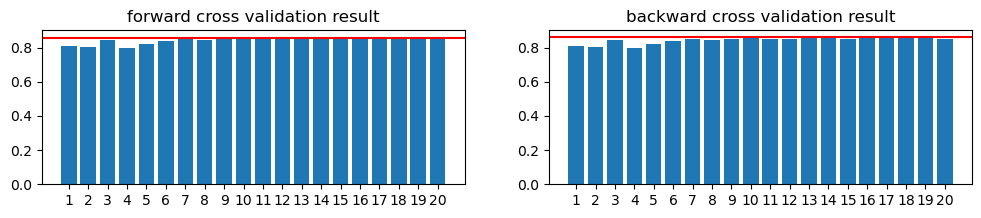

In [19]:
#changing the first row of the dictionary to a dataframe since the rest of the row is a repetition of the first
dictionary = pd.DataFrame(dictionary, index=['number'][0:])
#pivoting the datframe to a longer version so that the row values are lined up in a column
melted_dict_f = pd.melt(dictionary, var_name='n_features', value_name='value')

#changing the first row of the dictionary to a dataframe since the rest of the row is a repetition of the first
dictionary_b = pd.DataFrame(dictionary_b, index=['number'])[0:]
#pivoting the datframe to a longer version so that the row values are lined up in a column
melted_dict_b = pd.melt(dictionary_b, var_name='n_features', value_name='value')

plt.figure(figsize=(12,2))
plt.subplot(1,2,1)
ax = plt.bar(melted_dict_f['n_features'].astype('str'), melted_dict_f['value'])
plt.axhline(y=melted_dict_f['value'].max(), color='red')
plt.title('forward cross validation result')

plt.subplot(1,2,2)
ax = plt.bar(melted_dict_b['n_features'].astype('str'), melted_dict_f['value'])
plt.axhline(y=melted_dict_b['value'].max(), color='red')
plt.title('backward cross validation result')
plt.show()

The charts look mostly alike. From the chart we can deduce that the rate of change in the chart becomes stable in both at around 9 number of neighbors. 

## Confirming the optimal parameters
The chart has given us an idea of the changes in the performance of our model as we increase the number of neighbors. Its time to confirm what the peak performances are and make a decision

In [20]:
print('the top three forward number of neighbors:')
print(melted_dict_f.sort_values(by='value', ascending=False)[:3])
print('\n')
print('the top three backard number of neighbors:')
print(melted_dict_b.sort_values(by='value', ascending=False)[:3])

the top three forward number of neighbors:
    n_features     value
15          16  0.858298
18          19  0.858286
13          14  0.858286


the top three backard number of neighbors:
    n_features     value
8            9  0.859361
12          13  0.859349
16          17  0.858286


The backward model selector performs slightly better than forward selector with less number of neighbors, 9 as opposed to 16 for the forward method. Since the backward selector achieved a better performance with less number of neighbors we will explore its best performing parameters further

## Checking the results of the optimal parameters
We have confirmed that 9 number of neighbors is the optimal parameter, we will now check the corresponding columns selected in achieving the optimal result.

In [21]:
a = []
for feature in features_b:
    lenght = len(feature)
    a.append(lenght)
print('the optimal backward method number of columns for each iteration:')
print(np.array(a))
optimal_features = features_b[9]
print('\n')
print('the optimal backward method columns for the selected optimal number of neighbors:')
optimal_features

the optimal backward method number of columns for each iteration:
[10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10]


the optimal backward method columns for the selected optimal number of neighbors:


array(['Age', 'RestingBP', 'MaxHR', 'Sex_M', 'ChestPainType_ASY',
       'RestingECG_LVH', 'ExerciseAngina_N', 'ExerciseAngina_Y',
       'ST_Slope_Flat', 'ST_Slope_Up'], dtype=object)

## Applying the selected columns to a new model
Now that we know all the parameters that best optimize our model, its time to implement it into a new model and examine its results

In [22]:
xtrain_b, xval_b, ytrain_b, yval_b = train_test_split(x[optimal_features], y, test_size=0.25, random_state=99)
scaler = MinMaxScaler()
x_train_scaled_b = scaler.fit_transform(xtrain_b)
x_val_scaled_b = scaler.transform(xval_b)
knn_2 = KNeighborsClassifier(metric='minkowski', n_neighbors = 9)
knn_2.fit(x_train_scaled_b, ytrain_b)
train_val_acc = knn_2.score(x_train_scaled_b, ytrain_b)
test_val_acc = knn_2.score(x_val_scaled_b, yval_b)
print(f'the accuracy of the model on training data is: {round(train_val_acc, 2)}')
print(f'the accuracy of the model on test data is: {round(test_val_acc, 2)}')

the accuracy of the model on training data is: 0.87
the accuracy of the model on test data is: 0.86


The training model achieved approximately the same result as our previous model. However, it is able to generalize more on our test data than the previous with an increase of 2% on the test data

## Testing new model's ability to predict positive and negative cases
For the purpose of comparison, we will create a classification report to compare various metrics with our previous model. This will help us make a decision on the better model to adopt.

In [23]:
classification = classification_report(final_model.predict(x_test_scaled), y_test)
#using the print(classification report as a line break to organize the result of the classificatio_report)
print('old classification report')
print(classification)
print('\n')
classification_2 = classification_report(knn_2.predict(x_val_scaled_b), yval_b)
#using the print(classification report as a line break to organize the result of the classificatio_report)
print('new classification report')
print(classification_2)
matrix = confusion_matrix(knn_2.predict(x_val_scaled_b), yval_b)

old classification report
              precision    recall  f1-score   support

           0       0.79      0.89      0.84       105
           1       0.89      0.81      0.85       125

    accuracy                           0.84       230
   macro avg       0.84      0.85      0.84       230
weighted avg       0.85      0.84      0.84       230



new classification report
              precision    recall  f1-score   support

           0       0.82      0.89      0.85       108
           1       0.89      0.83      0.86       122

    accuracy                           0.86       230
   macro avg       0.86      0.86      0.86       230
weighted avg       0.86      0.86      0.86       230



Our new model improves accuracy in the prediction of the negative cases by 3% and increases the recall value by 2%. This is a slight improvement from our previous model. This improvement was achieved using a smaller number of feature and number of neighbors. For this reason, our new model will be considered for use over the precious. Let's explore further

## Cross examining the new model
Just like we did with the previous model, we need to be certain that the new model can generalize well on unseen data of various type.

In [24]:
print('\033[1m' + 'old model cross validation results' + '\033[0m')
cross_val = cross_val_score(final_model, x_scaled, y, cv=5)
#calculating the average of our five results
print(f'cross validation average value: {cross_val.mean()}')
print(f'cross validation minimum value: {cross_val.min()}')
print(f'cross validation maximum value: {cross_val.max()}')
print(f'cross validation standard deviation value: {cross_val.std()}')

print('\n')

print('\033[1m' + 'new model cross validation results' + '\033[0m')
new_cross_val = cross_val_score(knn_2, x_scaled, y, cv=5)
print(f'cross validation average value: {new_cross_val.mean()}')
print(f'cross validation minimum value: {new_cross_val.min()}')
print(f'cross validation maximum value: {new_cross_val.max()}')
print(f'cross validation standard deviation value: {new_cross_val.std()}')

old model cross validation results
cross validation average value: 0.8364991684485625
cross validation minimum value: 0.7814207650273224
cross validation maximum value: 0.9293478260869565
cross validation standard deviation value: 0.051286349616081174


new model cross validation results
cross validation average value: 0.8321572820147303
cross validation minimum value: 0.7759562841530054
cross validation maximum value: 0.9184782608695652
cross validation standard deviation value: 0.047567813561400246


Despite the fact that our new model performed better than the previous one in terms of predicting negative and positive cases on both the test and training data and also capturing our data well, it performs slightly worse than the previous in its prediction on every part of our dataset. The previous had a higher minimum and maximum accuracy rate at around 1% increase. However, the deviation from the average value is slighly better in our new model.

## Increasing the number of k-folds
We will see if the previous model maintains a better cross validation performance when the training and test are done on 10 different datasets within our data. Previously, we performed the cross validation on 5 different datasets.

In [25]:
print('\033[1m' + 'old model cross validation results' + '\033[0m')
cross_val = cross_val_score(final_model, x_scaled, y, cv=10)
#calculating the average of our five results
print(f'cross validation average value: {cross_val.mean()}')
print(f'cross validation minimum value: {cross_val.min()}')
print(f'cross validation maximum value: {cross_val.max()}')
print(f'cross validation standard deviation value: {cross_val.std()}')

print('\n')

print('\033[1m' + 'new model cross validation results' + '\033[0m')
new_cross_val = cross_val_score(knn_2, x_scaled, y, cv=10)
print(f'cross validation average value: {new_cross_val.mean()}')
print(f'cross validation minimum value: {new_cross_val.min()}')
print(f'cross validation maximum value: {new_cross_val.max()}')
print(f'cross validation standard deviation value: {new_cross_val.std()}')

old model cross validation results
cross validation average value: 0.8408504538939321
cross validation minimum value: 0.75
cross validation maximum value: 0.9239130434782609
cross validation standard deviation value: 0.06302367313213435


new model cross validation results
cross validation average value: 0.8419254658385092
cross validation minimum value: 0.75
cross validation maximum value: 0.9347826086956522
cross validation standard deviation value: 0.060408798865980814


As we increased the cross validation number of k-folds, the results became more similar in each model. At this point we should be confident that choosing either model should give us similar level of confidence on unseen data. However, since we can achieve similar results with less data on our new model, it makes more sense to choose it over the previous.

## Building logistic regression model
We have exhausted optimization techniques in building an optimal model using the KNN. Let's now try logistic regression and compare the results

In [26]:
from sklearn.linear_model import LogisticRegression

l_model = LogisticRegression()
l_model.fit(x_train_scaled_b, ytrain_b)
l_pred = l_model.predict(x_train_scaled_b)
t_pred = l_model.predict(x_train_scaled_b)
t_accuracy = l_model.score(x_train_scaled_b, ytrain_b)
l_accuracy = l_model.score(x_val_scaled_b, yval_b)
print(f'the accuracy of the model on training data is: {round(t_accuracy, 2)}')
print(f'the accuracy of the data on test data is: {round(l_accuracy, 2)}')
print('\n')
print('the coefficients are:')
np.exp(l_model.coef_)

the accuracy of the model on training data is: 0.85
the accuracy of the data on test data is: 0.86


the coefficients are:


array([[4.60996856, 1.2593547 , 0.49970321, 5.30871869, 4.65594105,
        1.05076401, 0.5827319 , 1.71679896, 2.02834115, 0.17486808]])

As a first step we applied the optimal columns from the selection process earlier. However, these columns were selected as the optimal for the KNN model. Appling a selection process based on the logistic model may increase the accuracy of our model but first let's view other performance results.

## Creating a classification report
We can compare the result to the previous models and evaluate how well it is able to predict in comparison to the other models

In [27]:
print(classification_report(l_model.predict(x_val_scaled_b), yval_b))

              precision    recall  f1-score   support

           0       0.85      0.88      0.86       113
           1       0.88      0.85      0.86       117

    accuracy                           0.86       230
   macro avg       0.86      0.86      0.86       230
weighted avg       0.86      0.86      0.86       230



The logistic regression model has a similar accuracy score with the KNN. This is a good start considering that we only used the optimized variables from the KNN model. It also shows a more balanced prediction of the negative and positive classes. Let's prepare its own optimized variables.

## Selecting variables that optimize the logistic regression
We have established that the logistics regression model showed a promising result. We will use the the feature selector to select the columns that help improve the model's accuracy and see if it outperforms other previous models

In [28]:
l_backward = SequentialFeatureSelector(estimator=l_model, n_features_to_select='auto', tol=None, direction='backward', n_jobs=-1)
l_backward.fit(x, y)
backward_selector = l_backward.get_feature_names_out()

l_forward = SequentialFeatureSelector(estimator=l_model, n_features_to_select='auto', tol=None, direction='forward', n_jobs=-1)
l_forward.fit(x, y)
forward_selector = l_forward.get_feature_names_out()

print(backward_selector)
print('\n')
print(forward_selector)
np.sum(backward_selector == forward_selector)

['Age' 'RestingBP' 'Cholesterol' 'FastingBS' 'Oldpeak' 'Sex_F'
 'ChestPainType_ASY' 'ExerciseAngina_N' 'ST_Slope_Down' 'ST_Slope_Flat']


['FastingBS' 'Oldpeak' 'Sex_F' 'Sex_M' 'RestingECG_LVH' 'ExerciseAngina_N'
 'ExerciseAngina_Y' 'ST_Slope_Down' 'ST_Slope_Flat' 'ST_Slope_Up']


0

The result only contains 3 similar results from the optimized KNN variables used earlier

## Cross-validating the results
We will check the feature selector result that does a better job generalizing on unseen data and select it in our model logistic model creation

In [29]:
f_scores = cross_val_score(l_model, x[forward_selector], y, cv=5)
f_mean = f_scores.mean()
print(f_mean)

b_scores = cross_val_score(l_model, x[backward_selector], y, cv=5)
b_mean = b_scores.mean()
b_mean

0.8473984319315753


C:\Users\USER\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\USER\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

0.852862912805892

The backward selector performed better in the cross-validation test. Therefore, the backward selector variables will be used to create a new model

## Creating the logistic model
As confirmed in the previous cell that the backward feature selector has the best features that optimized our predictions accuracy, the features will now be implemented in building the model

In [30]:
x_train, x_test, y_train, y_test = train_test_split(x[backward_selector], y, test_size=.25, random_state=99)
x_train_scaler = scaler.fit_transform(x_train)
x_test_scaler = scaler.transform(x_test)
logistics = l_model.fit(x_train_scaler, y_train)
pred_l = logistics.predict(x_train_scaler)

print(logistics.score(x_train_scaler, y_train))
logistics.score(x_test_scaler, y_test)


0.8691860465116279


0.8652173913043478

Our final logistics model produced a more even but high accuracy in both the training and test data. let's evaluate its performance on other metrics using the classification report

## Creating logistic regression classification report
The classification report will help us understand how well the model is able to predict each class just like we did for the other models. We will then compare the results and make our final decision

In [31]:
print('\033[1m' + 'Classification report result from Logistic Regression' + '\033[0m')
print(classification_report(logistics.predict(x_test_scaler), y_test))
print('\n')
print('\033[1m' + 'Classification report result from Final KNN model' + '\033[0m')
print(classification_2)

Classification report result from Logistic Regression
              precision    recall  f1-score   support

           0       0.84      0.89      0.86       110
           1       0.89      0.84      0.87       120

    accuracy                           0.87       230
   macro avg       0.87      0.87      0.87       230
weighted avg       0.87      0.87      0.87       230



Classification report result from Final KNN model
              precision    recall  f1-score   support

           0       0.82      0.89      0.85       108
           1       0.89      0.83      0.86       122

    accuracy                           0.86       230
   macro avg       0.86      0.86      0.86       230
weighted avg       0.86      0.86      0.86       230



There is a slightly more improved performance in most of the metrics from the classification report. In areas where there is no improvement the result stays the same. This means that the model produced equal results in some areas and better results in others.

## Creating decision tree model
Finally, let's explore the decision tree to build our model and see how it performs. The max_depth and random_state parameters will be experimented with till a satisfactory result is reached. The process of experimentation will not be document below

0.8982558139534884
0.8739130434782608


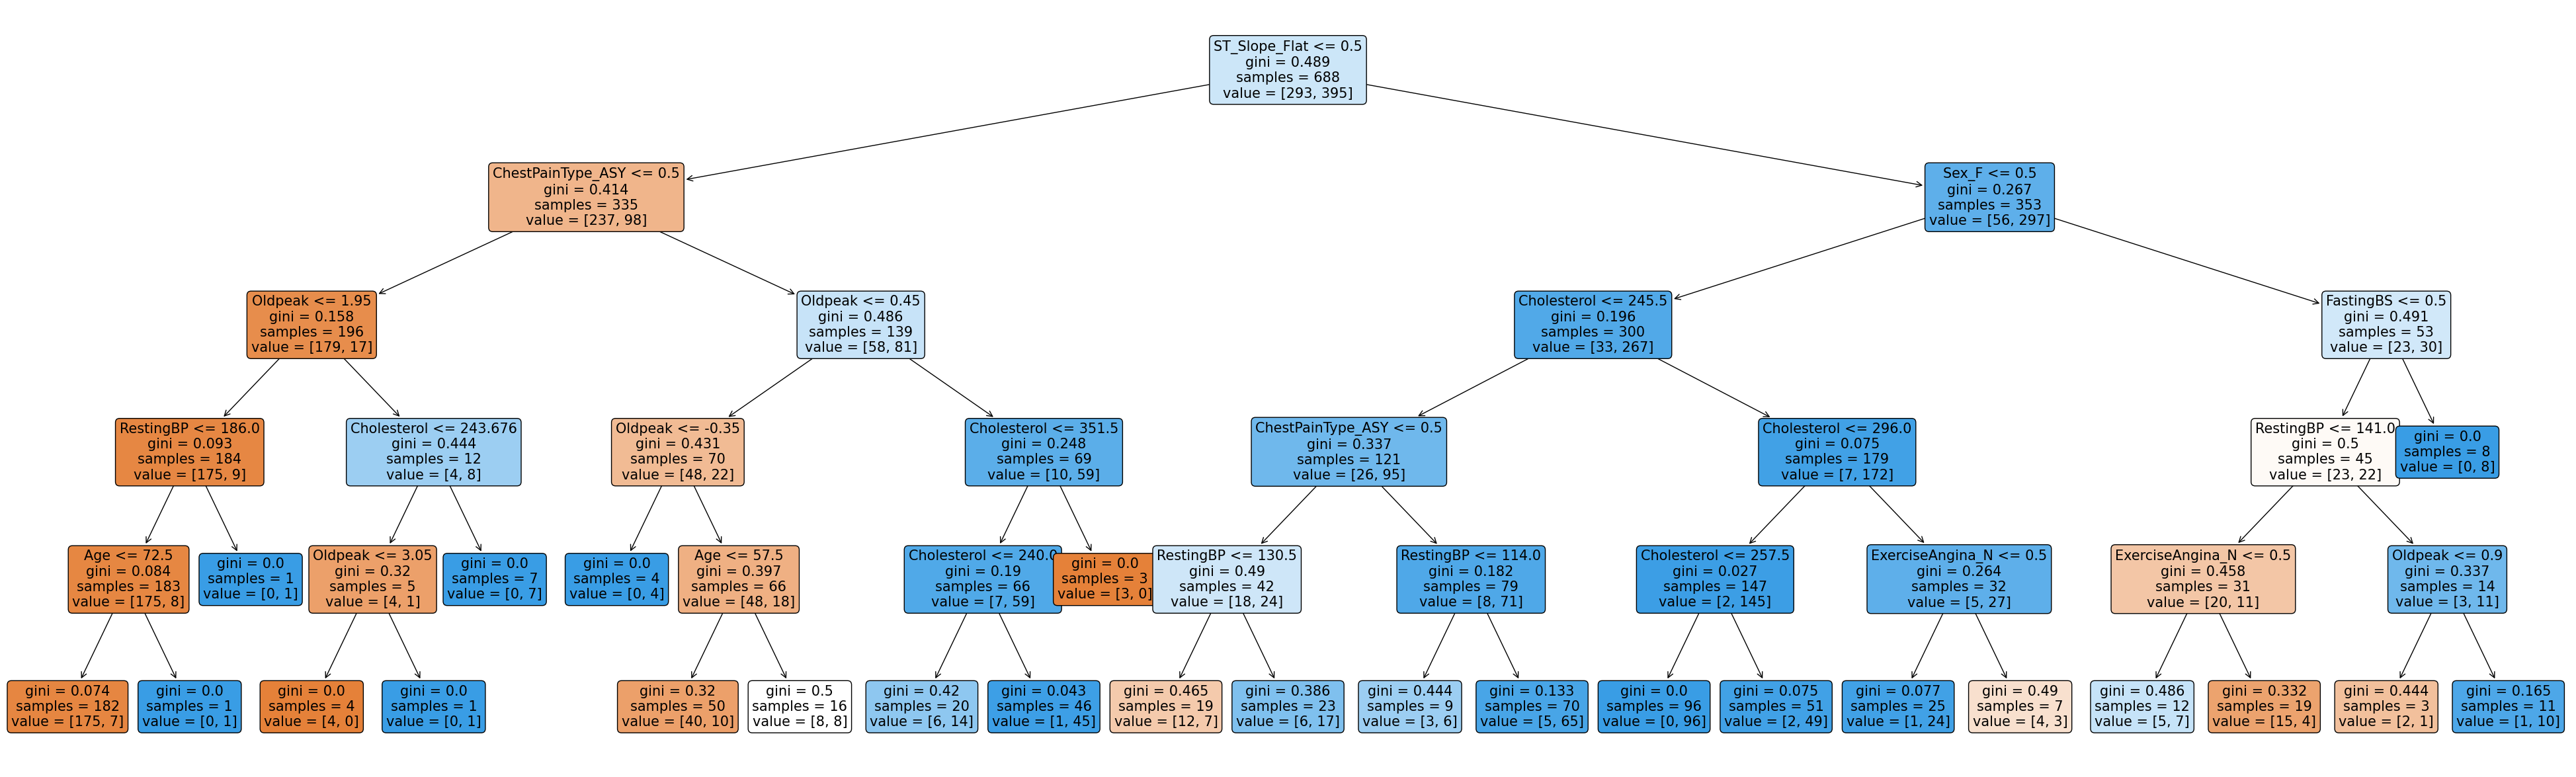

In [32]:
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, VotingClassifier
d_tree = DecisionTreeClassifier(max_depth=5, random_state=9)
d_tree.fit(x_train, y_train)
print(d_tree.score(x_train, y_train))
print(d_tree.score(x_test, y_test))
#print(export_text(d_tree, feature_names=list(x_train.columns)))
plt.figure(figsize=(50,15))
_ = plot_tree(d_tree, feature_names=x_train.columns, filled=True, rounded=True, fontsize=15)

## Visualizing the decision tree structure
The best part about the decision tree is that it can be easily explained visually. We will create the tree and see how the predictions are made

In [ ]:
plt.figure(figsize=(50,15))
_ = plot_tree(d_tree, feature_names=x_train.columns, filled=True, rounded=True, fontsize=15)

## Printing decision tree classification report
Our model showed a good result. The best test result so far! Let's view how well it is able to predict each of our classes on the other metrics

In [33]:
print(classification_report(d_tree.predict(x_test), y_test))

              precision    recall  f1-score   support

           0       0.87      0.88      0.88       116
           1       0.88      0.87      0.87       114

    accuracy                           0.87       230
   macro avg       0.87      0.87      0.87       230
weighted avg       0.87      0.87      0.87       230



## Applying random forest ensemble method 
The random forest help us optimize our result by creating a vote from different random subtree created from our data with features chosen with replacement, helping us make up for the weakness in some of the trees predictions. The parameters will be experimented with till an optimal result is reached. The experimentation process will not be documented

In [34]:
r_class = RandomForestClassifier(n_estimators=15, max_depth=3, random_state=3)
r_class.fit(x_train, y_train)
r_class.score(x_test, y_test)

0.8739130434782608

The result produced in the random forest is identital to the result from the original decision tree model first made. ince the results are similar, it is better to stick with the first model as it is less complex and easier to understand.

## Creating a classification report
Let's check the results of other valuable metrics in the preparation of our model

In [ ]:
print(classification_report(r_class.predict(x_test), y_test))

## Applying extra random trees
Unlike the random forest where the default bootstrapping parameter is false preventing the model from using the entire observations to create the subtrees, the extra tree will use all of the observations in our data and select a threshold at random

In [35]:
ext_model = ExtraTreesClassifier(n_estimators=40, max_depth=5, random_state=72)
ext_model.fit(x_train, y_train)
ext_model.score(x_test, y_test)

0.8782608695652174

The extra tree produced a slightly better result than its predecessors. We will apply one final optimization technique and then make our final decision on the best model to predict heart disease cases.

## Apply minimal cost complexity pruning
This helps us penalize trees that use a lot of leaves, thereby preventing overfitting on the model. This is our final attempt at improving the result of our model. Let's try this final attempt.

[0.7956521739130434, 0.7956521739130434, 0.7913043478260869, 0.7913043478260869, 0.7913043478260869, 0.7913043478260869, 0.7913043478260869, 0.7913043478260869, 0.7913043478260869, 0.7913043478260869, 0.8, 0.8043478260869565, 0.8043478260869565, 0.8043478260869565, 0.8043478260869565, 0.808695652173913, 0.8217391304347826, 0.8260869565217391, 0.8217391304347826, 0.8304347826086956, 0.808695652173913, 0.808695652173913, 0.808695652173913, 0.8304347826086956, 0.8434782608695652, 0.8434782608695652, 0.8434782608695652, 0.8434782608695652, 0.8434782608695652, 0.8434782608695652, 0.8434782608695652, 0.8478260869565217, 0.8521739130434782, 0.8608695652173913, 0.8608695652173913, 0.8782608695652174, 0.8739130434782608, 0.8739130434782608, 0.8695652173913043, 0.8695652173913043, 0.8652173913043478, 0.8434782608695652, 0.808695652173913, 0.808695652173913, 0.808695652173913, 0.808695652173913, 0.808695652173913, 0.8217391304347826, 0.8217391304347826, 0.7956521739130434, 0.7739130434782608, 0.4

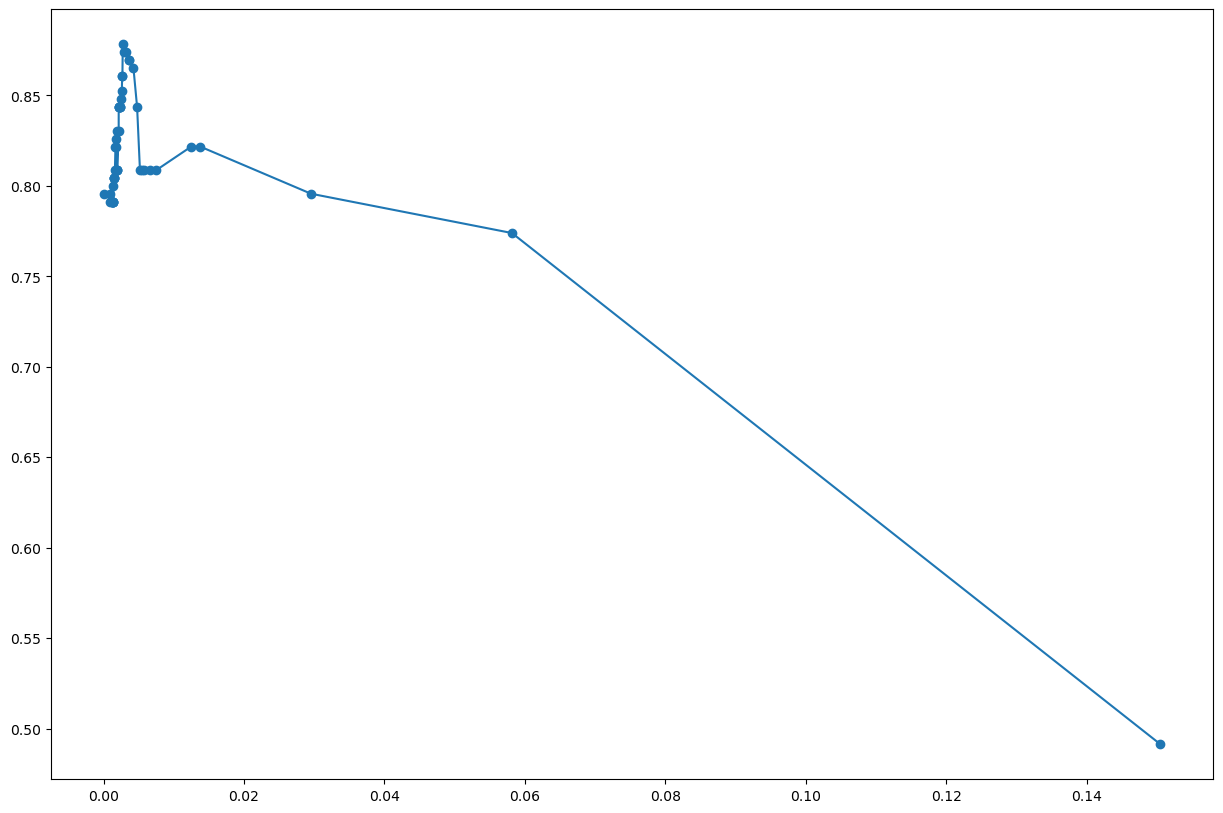

In [51]:
unpruned = DecisionTreeClassifier(random_state=9)
cost_unpruned = unpruned.cost_complexity_pruning_path(x_train, y_train)
cost_alpha = cost_unpruned.ccp_alphas
alpha_res = []
for alpha in cost_alpha:
    subtree = DecisionTreeClassifier(random_state=9, ccp_alpha=alpha)
    subtree.fit(x_train, y_train)
    subtree_score = subtree.score(x_test, y_test)
    alpha_res.append(subtree_score)
    
print(alpha_res)

plt.figure(figsize=(15,10))
plt.plot(cost_alpha, alpha_res, marker='o')
plt.show()

## Accessing the optimal result
We created a list of alphas from our unpruned decision tree model in the previous cell that will help penalize the tree and prevent overfitting to optimize result. We will check the alpha from the list that creates the optimal result from the list of alphas from the unpruned decision tree.

In [61]:
alpha_scores = tuple(zip(cost_alpha, alpha_res))
max_alpha = max(alpha_scores, key=lambda x: x[1])[0]
print(max(alpha_scores, key=lambda x: x[1]))
cost_pruned = DecisionTreeClassifier(random_state=9, ccp_alpha=max_alpha)
cost_pruned.fit(x_train, y_train)
cost_pruned.score(x_test, y_test)

(0.002738535802899316, 0.8782608695652174)


0.8782608695652174

The result is similar to the one gotten from the extra tree model created earlier. Let's create a classification report before applying one final step to our process

In [62]:
print(classification_report(cost_pruned.predict(x_test), y_test))

              precision    recall  f1-score   support

           0       0.90      0.87      0.88       121
           1       0.86      0.89      0.87       109

    accuracy                           0.88       230
   macro avg       0.88      0.88      0.88       230
weighted avg       0.88      0.88      0.88       230



Interestingly, the precision of the negative class is higher in the minimal cost complexity pruning model. This is the first time this is the case in our journey

## Our final model
We have created a lot of models in our effort to maximize the prediction ability of our model. The last thing we do now is to bring together all the ensemble models created and use a majority vote from their prediction to predict our dataset. Let's build the model and see if it makes our model better

In [67]:
votings = VotingClassifier(estimators=[('random', r_class), ('extra', ext_model), ('cost', cost_pruned)], voting='hard') 
votings.fit(x_train, y_train)
votings.score(x_test, y_test)

0.8869565217391304

## Printing the classification report
Let's evaluate the model's performance on the other metrics

In [68]:
print(classification_report(votings.predict(x_test), y_test))

              precision    recall  f1-score   support

           0       0.85      0.93      0.88       107
           1       0.93      0.85      0.89       123

    accuracy                           0.89       230
   macro avg       0.89      0.89      0.89       230
weighted avg       0.89      0.89      0.89       230



After creating a lot of models from KNN, logistics and decision tree and applying optimization techniques to make the results better. We have come to the end of our model development. All other information on this project will be written in my report below.

## Conclusion

In conclusion, our final model showed significant improvement, achieving an impressive accuracy score of 89% on the test dataset, slightly better than previous versions. We thoroughly examined various accuracy metrics to ensure the model's robustness, addressing concerns about class prediction imbalances as in previous models.

Our analysis revealed commendable performance in predicting both positive and negative cases, with a precision rate of 93% for the positive class and 85% for the negative class. Although this led to a reduction in precision for the negative class compared to some previous models, our voting model emerged as the strongest candidate for deployment. Given the importance of accurately predicting positive cases, the voting model offers the optimal solution for our needs.

## Recommendation

Like any model, there's always room for improvement. To make our model better at predicting, we could try fine tuning its parameters or training it on a larger dataset. A bigger dataset gives the model more examples to learn from, potentially improving its ability to recognize patterns related to predicting if someone has a heart disease. This could lead to improved accurate predictions.

Additionally, exploring other machine learning models might be beneficial. Some models may be better at capturing these patterns than the models we used. Trying out different approaches could help optimize our results and find the model that works best for this specific task.

## Limitation

Our study encountered several limitations. Firstly, due to constraints, we could only apply a limited number of machine learning models to our dataset. This may have overlooked potentially superior alternatives. Secondly, it's essential to acknowledge that our model does not guarantee 100% accuracy in predicting outcomes, leading to a possibility of false results. Therefore, it should be regarded as an initial screening tool to assess potential heart disease. Regardless of the outcome, consulting accredited medical institutions for confirmation and further guidance is crucial.

## Methodology

After importing the data into Python, an Exploratory Data Analysis (EDA) was conducted using histograms, bar charts, and pie charts to visualize the relationships between the predictors and the outcome column. The results provided valuable insights, revealing patterns and anomalies. Anomalies were addressed to ensure the validity of our data.

Following the EDA, a correlation analysis was performed to confirm observed patterns and identify predictors strongly correlated with the outcome column. This step aided in selecting predictors with significant relationships.

Subsequently, we normalized all columns and proceeded to construct the initial model. Minowski distance calculation with a nearest neighbor value of 11 was chosen, and the GridSearchCV function from scikit-learn was employed to determine the best parameters.

Continuing with our methodology, we aimed to optimize the model's prediction by exploring combinations of features at different nearest neighbor values. The Sequential Feature Selector was utilized, employing both backward and forward methods. After thorough experimentation, the results indicated that the backward method, particularly with fewer neighbors, performed better.

After multiple iterations involving various models and optimization techniques (such as logistics regression, decision trees and randon forest), the highest accuracy was achieved in the final attempt using a VotingClassifier. This approach combined the predictions of multiple RandomForest models to predict our target class.